In [1]:
from convokit import Corpus, download
import re
import numpy as np

/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/.venv/lib/python3.11/site-packages/convokit/coordination/coordination.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


An error occurred: Torch not compiled with CUDA enabled


/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/.venv/lib/python3.11/site-packages/convokit/__init__.py:29: UserWarning: If you are using ConvoKit with Google Colab, incorrect versions of some packages (ex. scipy) may be imported while runtime start. To fix the issue, restart the session and run all codes again. Thank you!
  warnings.warn(


In [8]:
from model.config  import *
# from model.data import *
# from model.optimizer import *
# from utils.finetune_utils import *


In [2]:
from utils.data_processing import DataProcesser
from utils.data_processing import TextProcesser
from utils import corpus_utils as corp
import pandas as pd
import pprint as pp

# DataLoading

### Corpus Loading Dataframes

In [9]:
import os
final_filepath_kodis = os.path.join(fine_processed_dir, 'processed_kodis.csv')
raw_filepath_kodis = os.path.join(fine_raw_dir, 'KODIS-EN.csv')
corpus_kodis_filepath = os.path.join(corpus_dir, "custom")
corp.setConversationMetadata(["buyer_is_AI", "seller_is_AI", "convo_len", "provided_outcome"
    ,"s_SVI_instrumental", "s_SVI_self", "s_SVI_process", "s_SVI_relationship"])
test = DataProcesser(final_filepath_kodis)
kodis_corpus = corp.corpusBuilder(test)

Row Index in columns
*** 0 utterances with timestamp == 0 after imputation ***


,id,speaker,conversation_id,reply_to,timestamp,text
0,utt0_con0,Seller_0,utt0_con0,None,1699388149,Your sudden demand for a refund is unwarranted...
1,utt1_con0,Buyer_0,utt0_con0,utt0_con0,1699388150,"This was not the item I ordered, please provid..."
2,utt2_con0,Seller_0,utt0_con0,utt1_con0,1699388170,How about a compromise? I can offer you a part...
3,utt3_con0,Buyer_0,utt0_con0,utt2_con0,1699388217,"No, this was not the item I ordered. I have a ..."
4,utt4_con0,Seller_0,utt0_con0,utt3_con0,1699388235,"I can scrutinize your claim, but this requires..."
...,...,...,...,...,...,...
39463,utt5_con2850,Buyer_2850,utt0_con2850,utt4_con2850,1718879890,Thank you I appreciate that. I shall remove m...
39464,utt6_con2850,Seller_2850,utt0_con2850,utt5_con2850,1718879909,"Deal. Once I see changes on your end, I'll ini..."
39465,utt7_con2850,Buyer_2850,utt0_con2850,utt6_con2850,1718879998,I understand - please do follow through. I ha...
39466,utt8_con2850,Seller_2850,utt0_con2850,utt7_con2850,1718880018,"You have my word, I will follow through. A sna..."


,id
0,Seller_0
1,Buyer_0
2,Seller_0
3,Buyer_0
4,Seller_0
...,...
39463,Buyer_2850
39464,Seller_2850
39465,Buyer_2850
39466,Seller_2850


,id,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship
0,utt0_con0,False,True,16,1,NaN,NaN,NaN,NaN
1,utt0_con1,False,False,14,0,7.0,5.5,7.0,6.5
2,utt0_con2,False,True,12,0,NaN,NaN,NaN,NaN
3,utt0_con3,True,False,12,0,7.0,7.0,7.0,5.0
4,utt0_con4,True,False,14,0,4.5,5.0,4.5,5.5
...,...,...,...,...,...,...,...,...,...
2846,utt0_con2846,False,True,16,0,NaN,NaN,NaN,NaN
2847,utt0_con2847,False,True,10,0,NaN,NaN,NaN,NaN
2848,utt0_con2848,False,True,15,0,NaN,NaN,NaN,NaN
2849,utt0_con2849,False,False,11,0,5.0,6.0,6.5,5.0


39468it [00:00, 50047.92it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
Unique conversation_id’s in your utterance DF: 2851
['utt0_con0' 'utt0_con1' 'utt0_con2' 'utt0_con3' 'utt0_con4' 'utt0_con5'
 'utt0_con6' 'utt0_con7' 'utt0_con8' 'utt0_con9']


### TrainTestSplit

=== Testing imbalance_handling=none ===


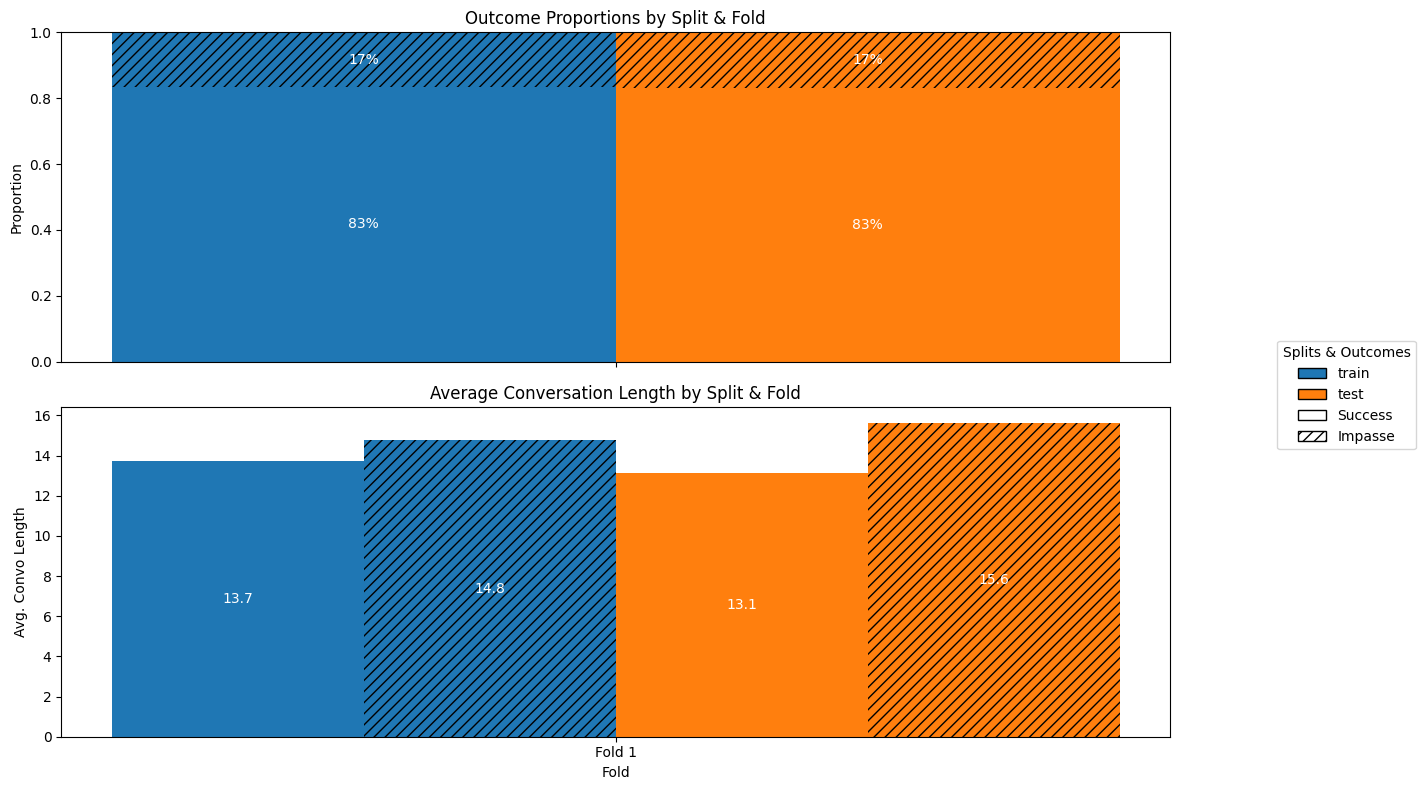

=== Testing imbalance_handling=stratified ===


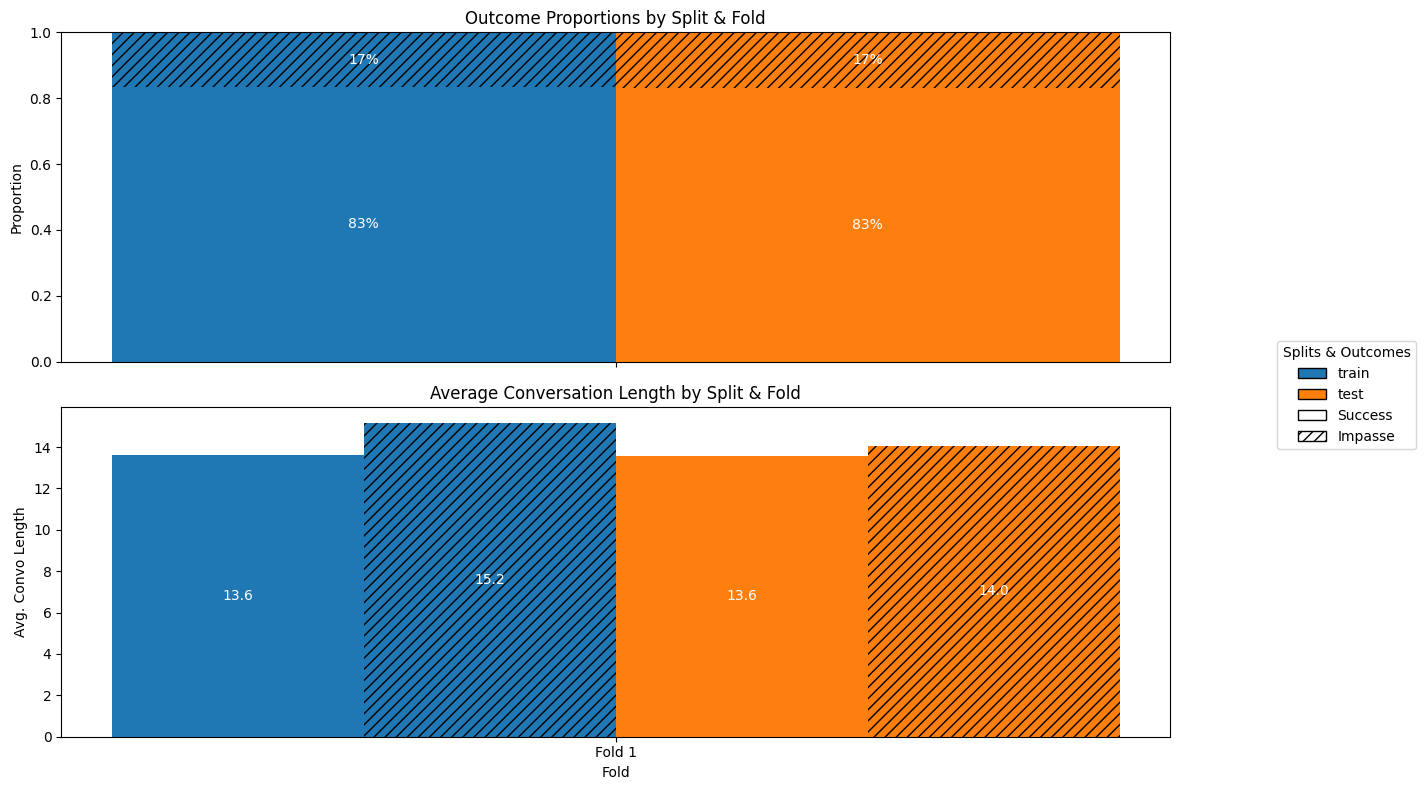

=== Testing imbalance_handling=downsampling ===


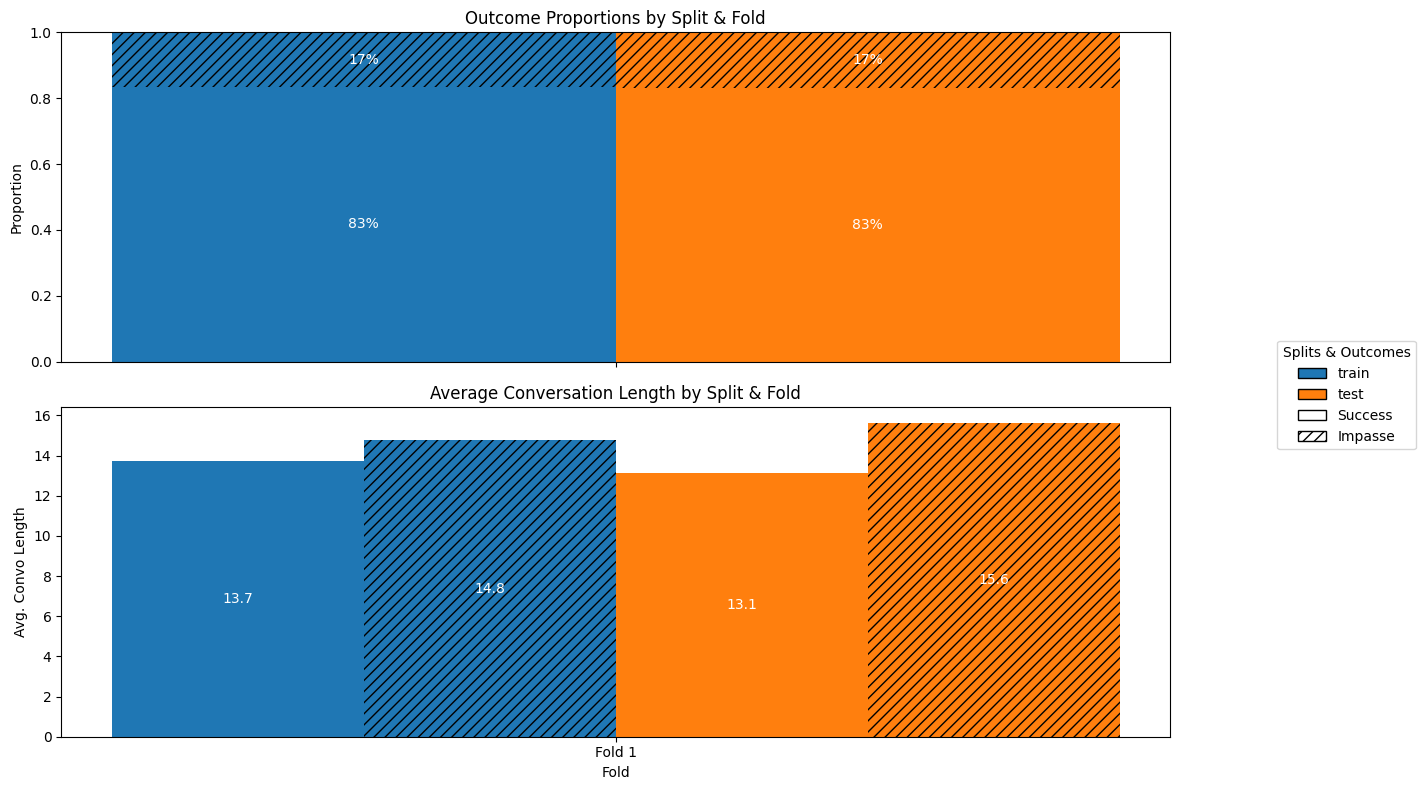

In [80]:
import importlib
import model.config as config
import model.data   as data
import utils.plotting_utils as plotting


def testsplit():
    convo_df= kodis_corpus.get_conversations_dataframe()
    utt_df = kodis_corpus.get_utterances_dataframe()
    X_train, X_test, y_train, y_test = createTrainTestSplit(convo_df)
    convo_df = assignSplit(convo_df, train_ids=X_train, test_ids=X_test)
    plot_fold_summary(
        [convo_df],
        split_col="meta.split",
        outcome_col="meta.provided_outcome",
        length_col="meta.convo_len",
        preferred_splits=("train","val","test")
    )
    
for h in ["none","stratified","downsampling"]:
    config.imbalance_handling = h
    config.random_seed= 42
    importlib.reload(data)
    importlib.reload(plotting)
    from model.data import createTrainTestSplit, assignSplit
    from utils.plotting_utils import plot_fold_summary

    print(f"=== Testing imbalance_handling={h} ===")
    testsplit()

### TrainValTest and TrainValSplit with K-folds >1

=== Testing imbalance_handling=none ===


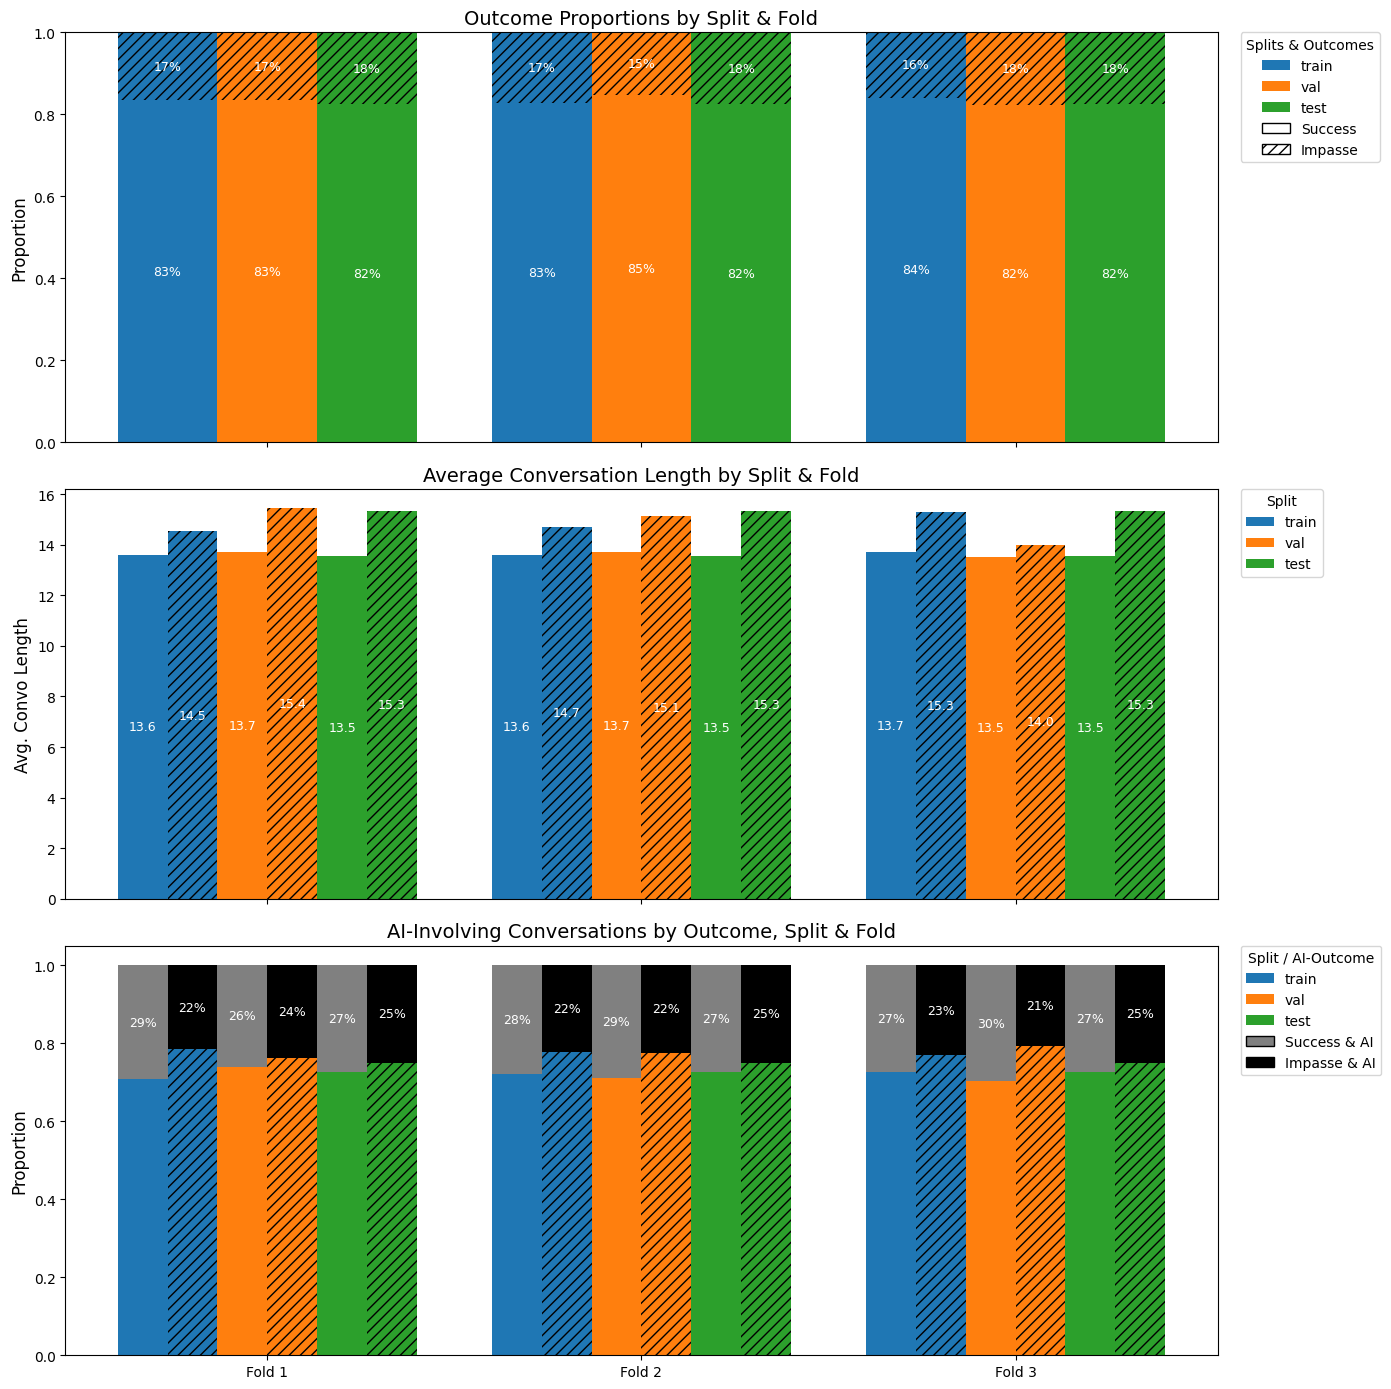

=== Testing imbalance_handling=stratified ===


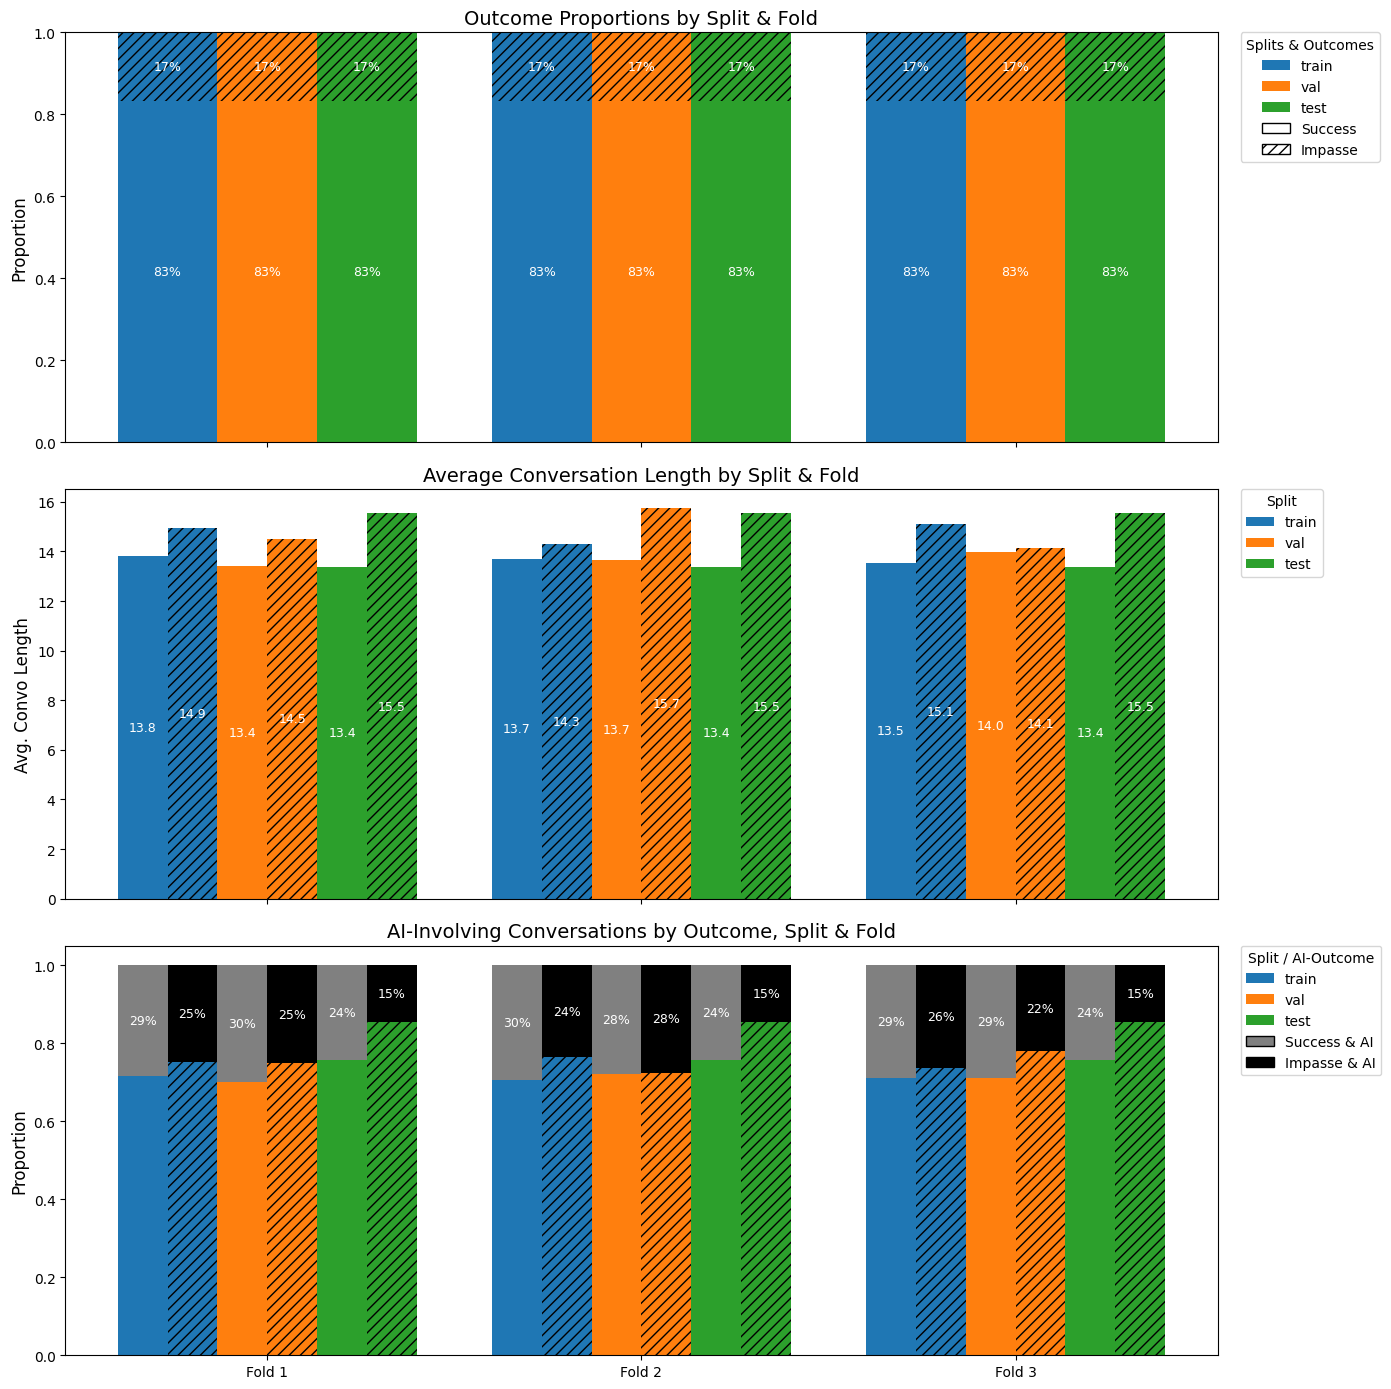

=== Testing imbalance_handling=downsampling ===


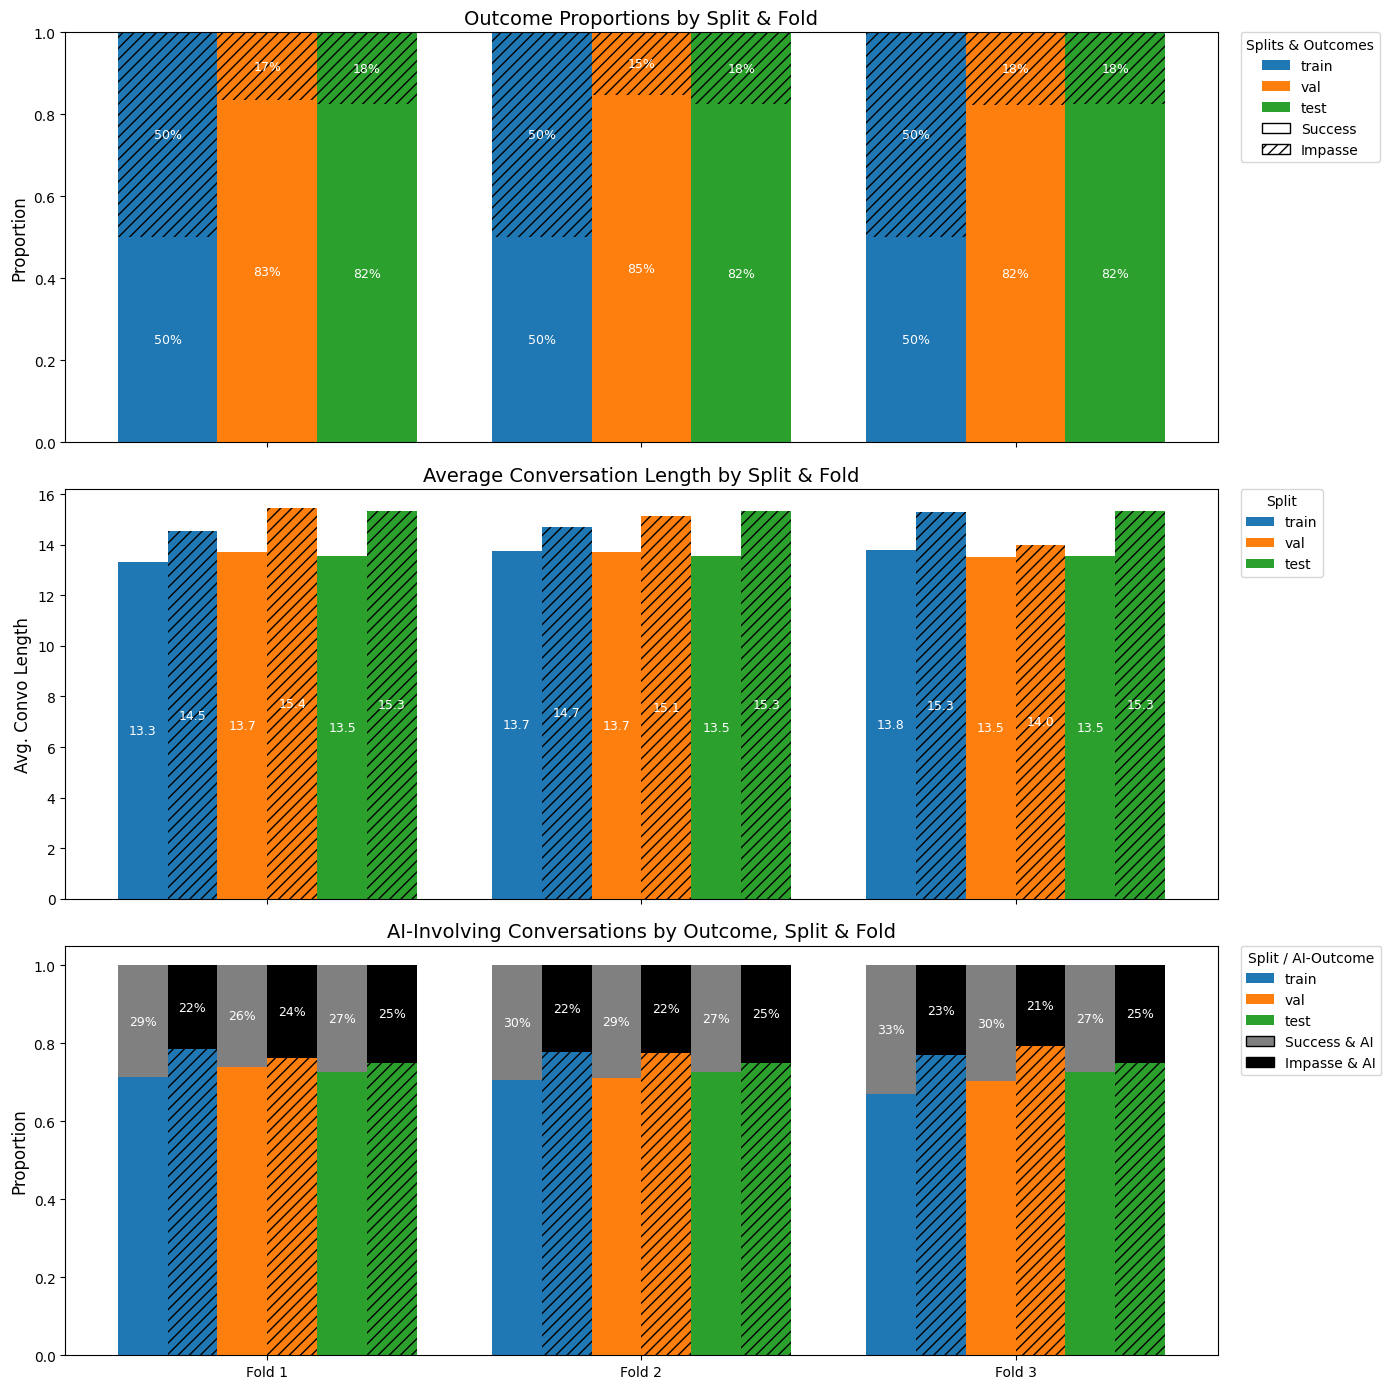

In [ ]:
def testsplit(h):
    imbalance_handling = h
    convo_df= kodis_corpus.get_conversations_dataframe()
    utt_df = kodis_corpus.get_utterances_dataframe()
    X_train, X_test, y_train, y_test = createTrainTestSplit(convo_df)
    convo_train = convo_df.loc[X_train]
    train_val_id_list = createTrainValSplit(convo_train)
    data_folds=[]
    for fold, pair in enumerate(train_val_id_list, start=1):
        convo_dataframe_fold = assignSplit(convo_df, train_ids=pair[0], val_ids=pair[1], test_ids= X_test)
        convo_dataframe_fold = assignSplit(convo_df, train_ids=pair[0], val_ids=pair[1], test_ids= X_test)
        data_folds.append(convo_dataframe_fold)

    plot_fold_summary_with_ai(
        data_folds,
        split_col="meta.split",
        outcome_col="meta.provided_outcome",
        length_col="meta.convo_len",
        preferred_splits=("train","val","test")
    )
               
for h in ["none","stratified", "downsampling"]:
    config.imbalance_handling = h
    config.random_seed= 205
    config.k_folds= 3
    importlib.reload(data)
    importlib.reload(plotting)
    from model.data import assignSplit, createTrainTestSplit, downsample, train_test_split, StratifiedKFold, KFold, createTrainValSplit
    from utils.plotting_utils import plot_fold_summary_with_ai
    from model.config import *
    print(f"=== Testing imbalance_handling={h} ===")
    testsplit(h)


### TrainValTest and TrainValSplit with K-folds == 1

=== Testing imbalance_handling=none ===


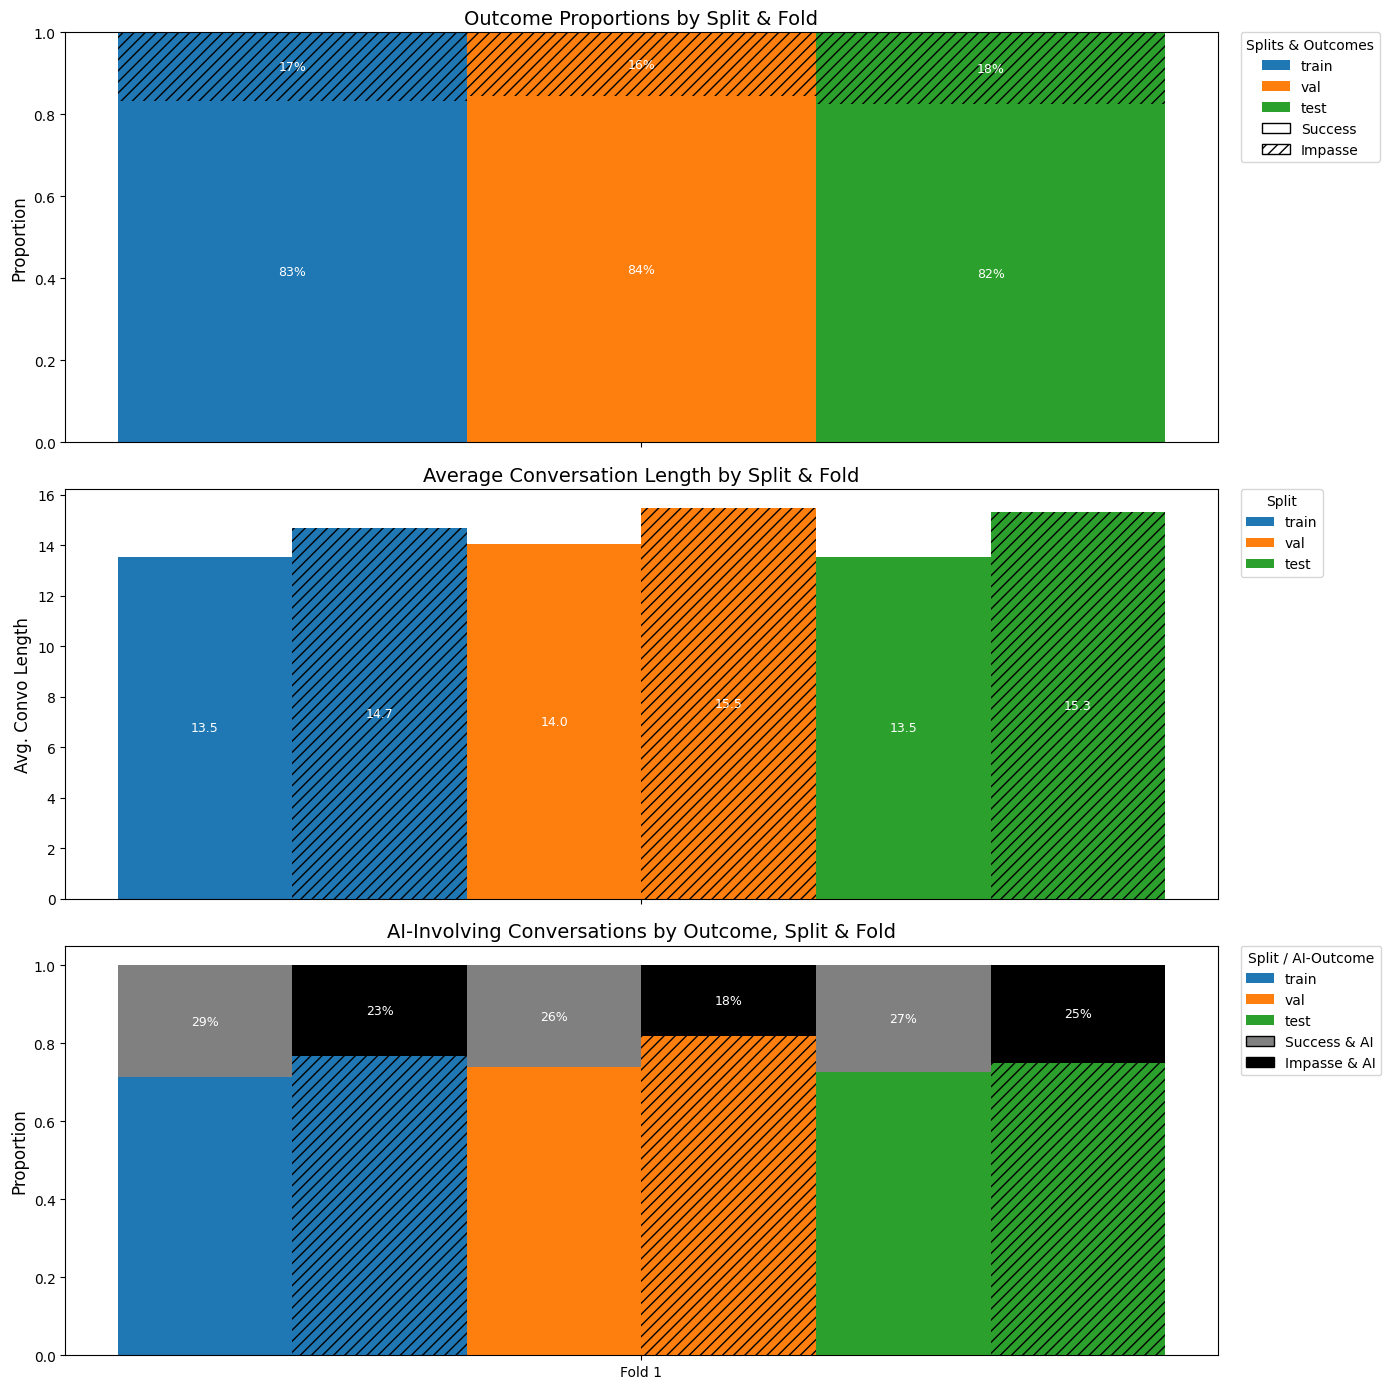

=== Testing imbalance_handling=stratified ===


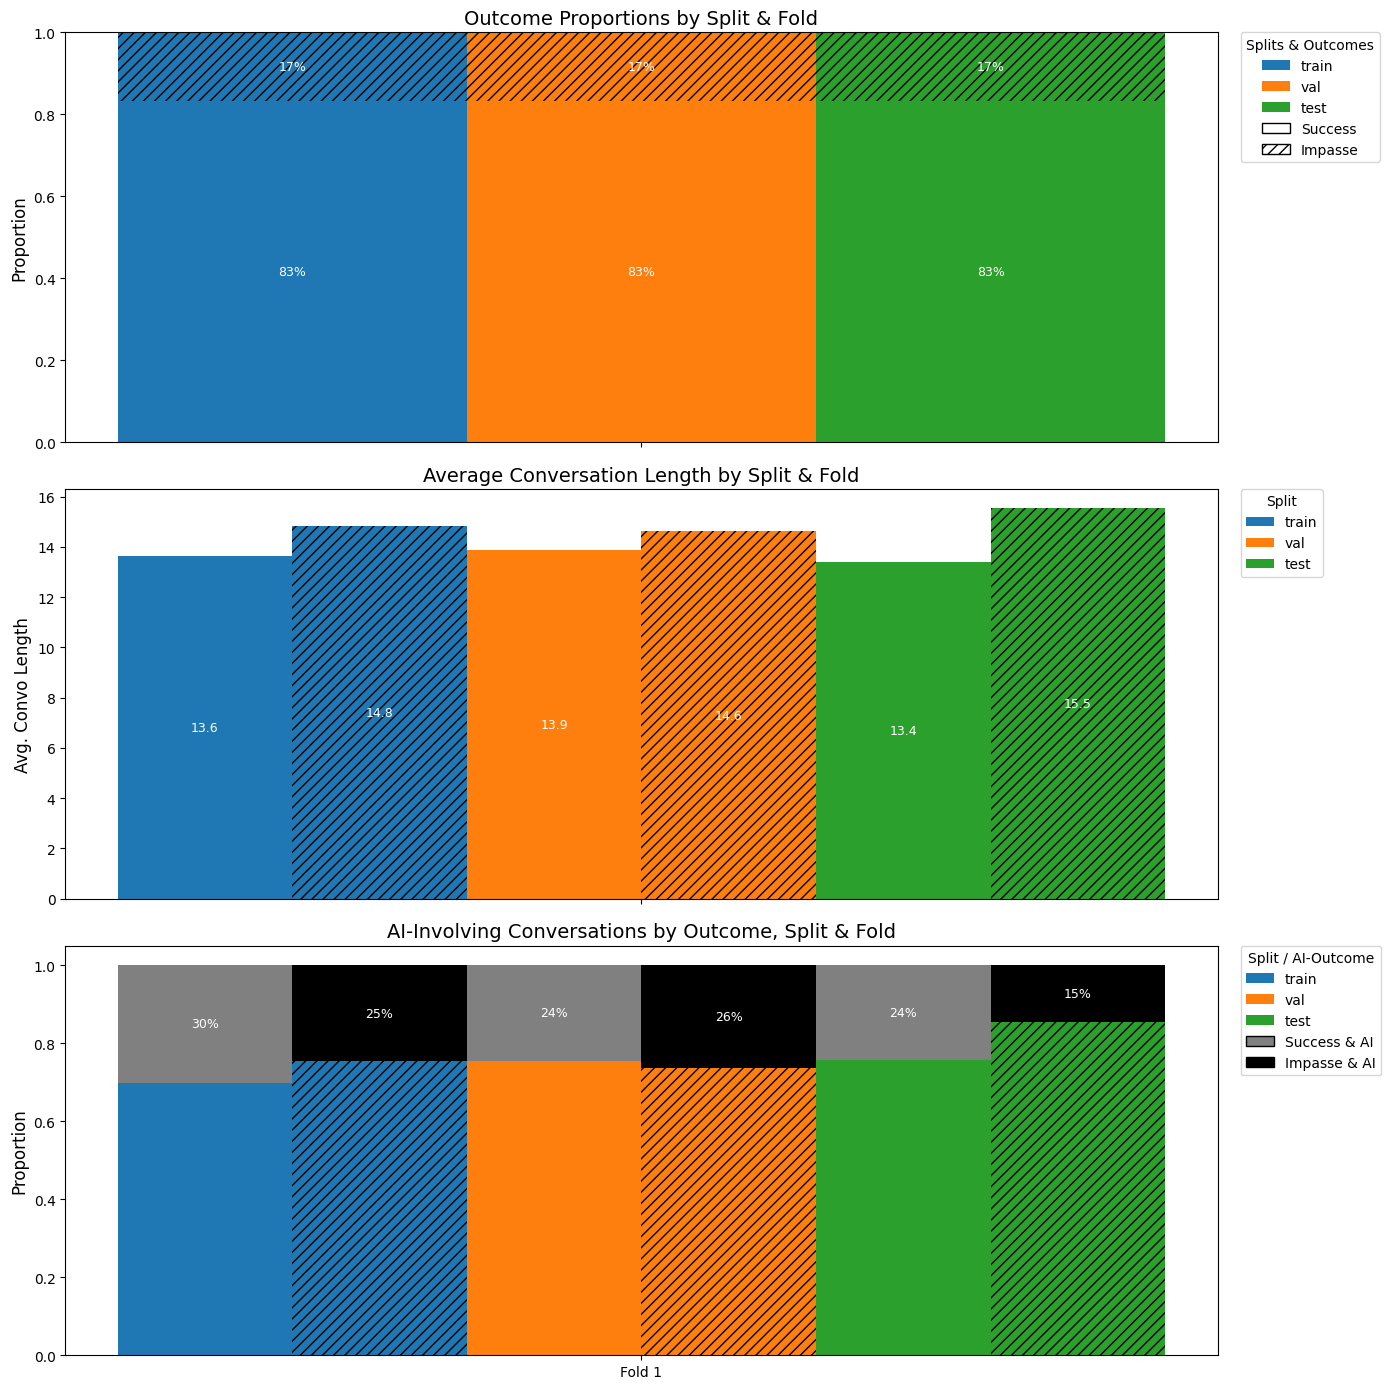

=== Testing imbalance_handling=downsampling ===
Before: {0: 1518, 1: 306}
 After: {1: 306, 0: 306}


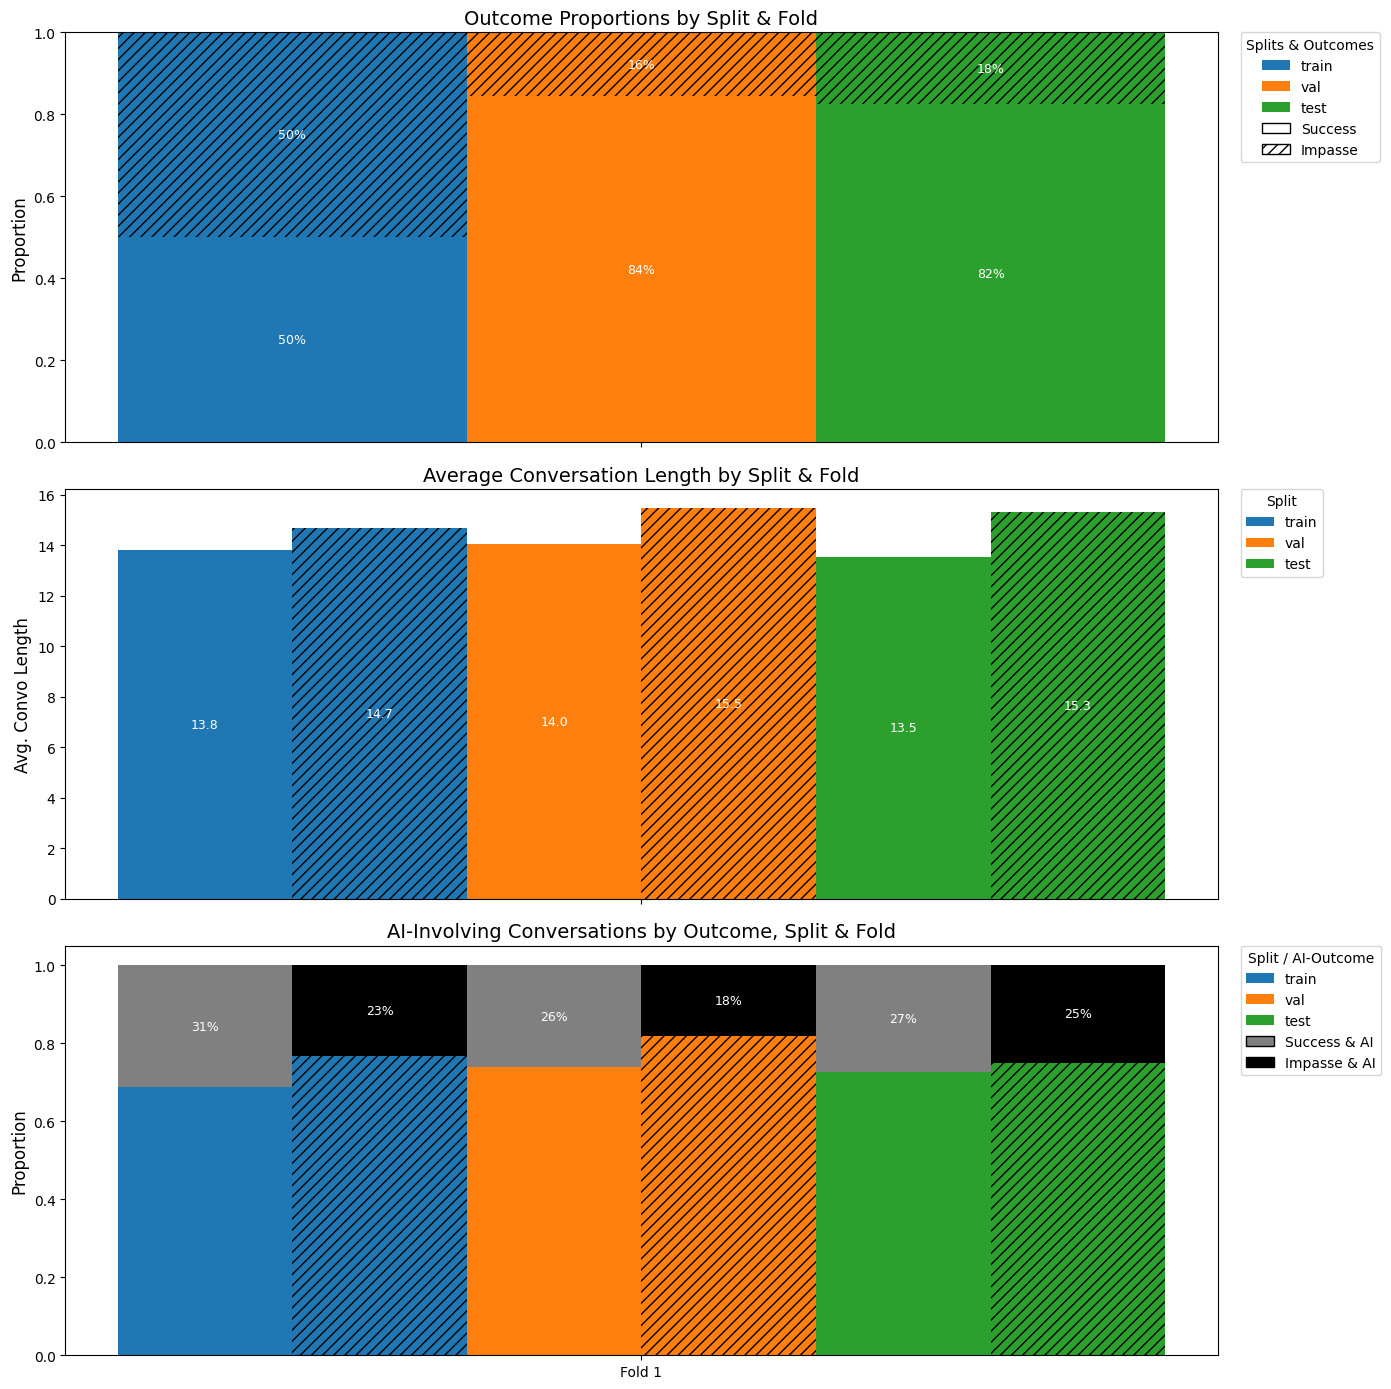

In [168]:
def createTrainValSplit(convo_df_train, imbalance_handling):
    convo_ids    = np.array(convo_df_train.index.tolist())
    convo_labels = convo_df_train[f"meta.{label_metadata}"].astype(int).values
    folds = []
    if k_folds > 1:
        if imbalance_handling == "stratified":
            skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_seed)
            for train_idx, val_idx in skf.split(convo_ids, convo_labels):
                train_ids = convo_ids[train_idx]
                val_ids   = convo_ids[val_idx]
                folds.append((train_ids, val_ids))
            return folds
        if imbalance_handling == "downsampling":
            kf = KFold(n_splits=k_folds, shuffle = True, random_state = random_seed)
            for train_idx, val_idx in kf.split(convo_ids, convo_labels):
                train_ids = convo_ids[train_idx]
                train_ids_down = downsample(convo_df_train, train_ids)
                val_ids   = convo_ids[val_idx]
                folds.append((train_ids_down, val_ids))
                before_counts = convo_df_train.loc[train_ids, f"meta.{label_metadata}"].value_counts()
                after_counts  = pd.Series(train_ids_down).map(convo_df_train[f"meta.{label_metadata}"].to_dict()).value_counts()
                print("Before:", before_counts.to_dict())
                print(" After:", after_counts.to_dict())
            return folds
        else:
            kf = KFold(n_splits=k_folds, shuffle = True, random_state = random_seed)
            for train_idx, val_idx in kf.split(convo_ids, convo_labels):
                train_ids = convo_ids[train_idx]
                val_ids   = convo_ids[val_idx]
                folds.append((train_ids, val_ids))
            return folds
    else:
        test_size = val_size  
        if imbalance_handling == "downsampling":
            train_ids, val_ids, *_ = train_test_split(convo_ids, convo_labels,test_size=test_size, random_state=random_seed)
            train_ids_down = downsample(convo_df_train, train_ids)
            folds.append((train_ids_down, val_ids))
            before_counts = convo_df_train.loc[train_ids, f"meta.{label_metadata}"].value_counts()
            after_counts  = pd.Series(train_ids_down).map(convo_df_train[f"meta.{label_metadata}"].to_dict()).value_counts()
            print("Before:", before_counts.to_dict())
            print(" After:", after_counts.to_dict())
            return folds
        if imbalance_handling == "stratified":
            train_ids, val_ids, *_ = train_test_split( convo_ids, convo_labels, test_size= test_size, stratify=convo_labels, random_state=random_seed)
            folds.append((train_ids, val_ids))
            return folds
        else:
            train_ids, val_ids, *_ = train_test_split( convo_ids, convo_labels, test_size= test_size,  random_state=random_seed)
            folds.append((train_ids, val_ids))
            return folds


def testsplit(h):
    imbalance_handling = h
    convo_df= kodis_corpus.get_conversations_dataframe()
    utt_df = kodis_corpus.get_utterances_dataframe()
    X_train, X_test, y_train, y_test = createTrainTestSplit(convo_df)
    convo_train = convo_df.loc[X_train]
    train_val_id_list = createTrainValSplit(convo_train, imbalance_handling)
    data_folds=[]
    for fold, pair in enumerate(train_val_id_list, start=1):
        convo_dataframe_fold = assignSplit(convo_df, train_ids=pair[0], val_ids=pair[1], test_ids= X_test)
        convo_dataframe_fold = assignSplit(convo_df, train_ids=pair[0], val_ids=pair[1], test_ids= X_test)
        data_folds.append(convo_dataframe_fold)

    plot_fold_summary_with_ai(
        data_folds,
        split_col="meta.split",
        outcome_col="meta.provided_outcome",
        length_col="meta.convo_len",
        preferred_splits=("train","val","test")
    )
               
for h in ["none","stratified", "downsampling"]:
    config.imbalance_handling = h
    config.random_seed= 205
    config.k_folds= 1
    importlib.reload(data)
    importlib.reload(plotting)
    from model.data import assignSplit, createTrainTestSplit, downsample, train_test_split, StratifiedKFold, KFold
    from utils.plotting_utils import plot_fold_summary_with_ai
    from model.config import *
    print(f"=== Testing imbalance_handling={h} ===")
    testsplit(h)



# Testing Filtering

In [111]:
test.filterMatches("Accept Deal")
test.filterMatches("I Walk Away")
test.filterMatches("Submit agreement")
no_accept_df= test.filterRows("message", exclude_val="Accept Deal", case_ex=True)
no_submit_df= test.filterRows("message", exclude_val="I Walk Away", case_ex=True)
sub_filtered = test.filterRows("message", exclude_val="Submitted agreement", case_ex=True)
no_last_df = test.filterRows("message", exclude_val=["Accept Deal", "I Walk Away"], case_in=True)
display(sub_filtered)
test_corpus = corp.corpusBuilder(test)

,timestamp,message,uttidx,speaker_id,is_AI,row_idx,match_idx,Case Match Type,convo_len
0,nan,Your sudden demand for a refund is unwarranted...,0,Seller_0,True,0,False,NaN,16
1,1699388150,"This was not the item I ordered, please provid...",1,Buyer_0,False,0,False,NaN,16
2,1699388170,How about a compromise? I can offer you a part...,2,Seller_0,True,0,False,NaN,16
3,1699388217,"No, this was not the item I ordered. I have a ...",3,Buyer_0,False,0,False,NaN,16
4,1699388235,"I can scrutinize your claim, but this requires...",4,Seller_0,True,0,False,NaN,16
...,...,...,...,...,...,...,...,...,...
39462,1718879809,"Alright, I can see this is really important fo...",4,Seller_2850,True,2850,False,NaN,10
39463,1718879890,Thank you I appreciate that. I shall remove m...,5,Buyer_2850,False,2850,False,NaN,10
39464,1718879909,"Deal. Once I see changes on your end, I'll ini...",6,Seller_2850,True,2850,False,NaN,10
39465,1718879998,I understand - please do follow through. I ha...,7,Buyer_2850,False,2850,False,NaN,10


*** 0 utterances with timestamp == 0 after imputation ***


,id,speaker,conversation_id,reply_to,timestamp,text
0,utt0_con0,Seller_0,utt0_con0,None,1699388149,Your sudden demand for a refund is unwarranted...
1,utt1_con0,Buyer_0,utt0_con0,utt0_con0,1699388150,"This was not the item I ordered, please provid..."
2,utt2_con0,Seller_0,utt0_con0,utt1_con0,1699388170,How about a compromise? I can offer you a part...
3,utt3_con0,Buyer_0,utt0_con0,utt2_con0,1699388217,"No, this was not the item I ordered. I have a ..."
4,utt4_con0,Seller_0,utt0_con0,utt3_con0,1699388235,"I can scrutinize your claim, but this requires..."
...,...,...,...,...,...,...
39463,utt5_con2850,Buyer_2850,utt0_con2850,utt4_con2850,1718879890,Thank you I appreciate that. I shall remove m...
39464,utt6_con2850,Seller_2850,utt0_con2850,utt5_con2850,1718879909,"Deal. Once I see changes on your end, I'll ini..."
39465,utt7_con2850,Buyer_2850,utt0_con2850,utt6_con2850,1718879998,I understand - please do follow through. I ha...
39466,utt8_con2850,Seller_2850,utt0_con2850,utt7_con2850,1718880018,"You have my word, I will follow through. A sna..."


,id
0,Seller_0
1,Buyer_0
2,Seller_0
3,Buyer_0
4,Seller_0
...,...
39463,Buyer_2850
39464,Seller_2850
39465,Buyer_2850
39466,Seller_2850


,id,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship
0,utt0_con0,False,True,16,1,NaN,NaN,NaN,NaN
1,utt0_con1,False,False,14,0,7.0,5.5,7.0,6.5
2,utt0_con2,False,True,12,0,NaN,NaN,NaN,NaN
3,utt0_con3,True,False,12,0,7.0,7.0,7.0,5.0
4,utt0_con4,True,False,14,0,4.5,5.0,4.5,5.5
...,...,...,...,...,...,...,...,...,...
2846,utt0_con2846,False,True,16,0,NaN,NaN,NaN,NaN
2847,utt0_con2847,False,True,10,0,NaN,NaN,NaN,NaN
2848,utt0_con2848,False,True,15,0,NaN,NaN,NaN,NaN
2849,utt0_con2849,False,False,11,0,5.0,6.0,6.5,5.0


39468it [00:00, 58652.74it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
Unique conversation_id’s in your utterance DF: 2851
['utt0_con0' 'utt0_con1' 'utt0_con2' 'utt0_con3' 'utt0_con4' 'utt0_con5'
 'utt0_con6' 'utt0_con7' 'utt0_con8' 'utt0_con9']


# Testing Context Creation

In [117]:
from model.data import loadPrecomputedVoc
from model.data import tokenize
utt_label_metadata = None
label_metadata = "provided_outcome"
def processLabeledDialogs(utt_df, voc):
    utt_df = utt_df.copy()
    utt_df["tokens"] = (utt_df["text"].map(tokenize) #-> tokens for eack text
        .map(lambda toks: [t if t in voc.word2index else "UNK" for t in toks])
    )
    if utt_label_metadata is None:
        print("utt metadata empty")
        utt_df["is_attack"] = 0
    else:
        print("utt metadata exists")
        utt_df["is_attack"] = (utt_df[f"meta.{utt_label_metadata}"].fillna(0).astype(int))
    return utt_df

def loadLabeledPairs(voc,utt_df, conv_df, last_only_train, last_only_val, last_only_test):
    utts = processLabeledDialogs(utt_df, voc)
    # Prepare split IDs
    splits = {}
    for split in ("train", "val", "test"):
        ids = conv_df.index[conv_df["meta.split"] == split].unique()
        splits[split] = set(ids)
        # print(f"Split {split} has {ids} conversations")


    def make_pairs_for_split(ids_set, last_only):
        pairs = []
        for convo_id, dialog_df in utts[utts["conversation_id"].isin(ids_set)].groupby("conversation_id", sort=False):
            dialog_df['label'] = dialog_df.index
            dialog = dialog_df[["tokens", "is_attack", 'label']].to_dict("records")
            #If we only have conversation-level labels, we assume the entire dialog 
            # is a context since it does not include a derailment devent. therefore, last comment needs to be encoded
            if utt_label_metadata is None:
                if label_metadata is None:
                    raise ValueError("If utt_label_metadata is None, label_metadata must be provided to identify the conversation label.")
                    return
                last_id = dialog[-1]["label"]
                conv_label = conv_df.at[convo_id, f"meta.{label_metadata}"]
                dialog.append({"tokens": ["UNK"],"is_attack": conv_label, "label": f"{last_id}_dummyreply"
                })
            idxs = [len(dialog) - 1] if last_only else range(1, len(dialog))
            for idx in idxs:
                context = [u["tokens"][: MAX_LENGTH - 1] for u in dialog[max(0, idx - CONTEXT_SIZE) : idx]]
                reply     = dialog[idx]["tokens"][: MAX_LENGTH - 1]
                label     = conv_df.at[convo_id, f"meta.{label_metadata}"] if label_metadata else dialog[idx]["is_attack"]
                # We make a forecast on the comment prior to the reply, so we use the label of the previous comment.
                comment_id = dialog[idx - 1]["label"]
                pairs.append((context, reply, label, comment_id))
        return pairs
    train_pairs = make_pairs_for_split(splits["train"],last_only_train)
    val_pairs   = make_pairs_for_split(splits["val"],last_only_val)
    test_pairs  = make_pairs_for_split(splits["test"], last_only_test)
    return train_pairs, val_pairs, test_pairs

In [ ]:

voc = loadPrecomputedVoc(corpus_name, word2index_path, index2word_path)

In [113]:
utts = kodis_corpus.get_utterances_dataframe().head(40)
utts["meta.provided_outcome"] = [ 1,0,1,1,1,0,2,3,4,6] + [ 1,0,1,1,1,0,2,3,4,6] +[ 1,0,1,1,1,0,2,3,4,6] +[ 1,0,1,1,1,0,2,3,4,6]
display(utts)

,timestamp,text,speaker,reply_to,conversation_id,vectors,meta.provided_outcome
id,,,,,,,
utt0_con0,1699388149,Your sudden demand for a refund is unwarranted...,Seller_0,None,utt0_con0,[],1
utt1_con0,1699388150,"This was not the item I ordered, please provid...",Buyer_0,utt0_con0,utt0_con0,[],0
utt2_con0,1699388170,How about a compromise? I can offer you a part...,Seller_0,utt1_con0,utt0_con0,[],1
utt3_con0,1699388217,"No, this was not the item I ordered. I have a ...",Buyer_0,utt2_con0,utt0_con0,[],1
utt4_con0,1699388235,"I can scrutinize your claim, but this requires...",Seller_0,utt3_con0,utt0_con0,[],1
utt5_con0,1699388324,"No, thank you. I do not want this item as it w...",Buyer_0,utt4_con0,utt0_con0,[],0
utt6_con0,1699388344,"Alright, if you agree to remove your negative ...",Seller_0,utt5_con0,utt0_con0,[],2
utt7_con0,1699388422,I will adjust my review to show you offered a ...,Buyer_0,utt6_con0,utt0_con0,[],3
utt8_con0,1699388445,That's a fair compromise. Once I receive the r...,Seller_0,utt7_con0,utt0_con0,[],4


In [118]:
conv_df =kodis_corpus.get_conversations_dataframe().head(5)
conv_df['meta.split'] =[ 'train', 'train', 'val', 'test', 'test']
display(conv_df)

,vectors,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship,meta.split
id,,,,,,,,,,
utt0_con0,[],False,True,16,1,NaN,NaN,NaN,NaN,train
utt0_con1,[],False,False,14,0,7.0,5.5,7.0,6.5,train
utt0_con2,[],False,True,12,0,NaN,NaN,NaN,NaN,val
utt0_con3,[],True,False,12,0,7.0,7.0,7.0,5.0,test
utt0_con4,[],True,False,14,0,4.5,5.0,4.5,5.5,test


In [119]:
train, val, test = loadLabeledPairs(voc, utts, conv_df, False,False, False)
print(f"Train pairs: {len(train)}")
print(f"train label: {train[1][3]}")
print(f"Val pairs: {len(val)}")
print(f"Test pairs: {len(test)}")
print(val)
train, val, test = loadLabeledPairs(voc, utts, conv_df, True, True, True)
print(f"Train pairs: {len(train)}")
print(f"Val pairs: {len(val)}")
print(f"Test pairs: {len(test)}")
print(val)

utt metadata empty
Train pairs: 30
train label: utt1_con0
Val pairs: 10
Test pairs: 0
[([['your', 'sudden', 'demand', 'for', 'a', 'refund', 'is', 'unwarranted', '.', 'our', 'product', 'description', 'is', 'crystal', 'clear', ',', 'and', 'we', 'stand', 'by', 'our', 'policy', '.', 'your', 'behavior', 'is', 'disappointing', ',', 'and', 'your', 'negative', 'review', 'is', 'unfounded', '.']], ['as', 'a', 'customer', ',', 'i', 'thought', 'the', 'jersey', 'was', 'kolby', "'", 's', 'and', 'i', 'noticed', 'you', 'changed', 'the', 'site', 'since', 'then', '.', 'i', 'think', 'a', 'refund', 'is', 'fair', '.'], 0, 'utt0_con2'), ([['your', 'sudden', 'demand', 'for', 'a', 'refund', 'is', 'unwarranted', '.', 'our', 'product', 'description', 'is', 'crystal', 'clear', ',', 'and', 'we', 'stand', 'by', 'our', 'policy', '.', 'your', 'behavior', 'is', 'disappointing', ',', 'and', 'your', 'negative', 'review', 'is', 'unfounded', '.'], ['as', 'a', 'customer', ',', 'i', 'thought', 'the', 'jersey', 'was', 'kolb

# Tokenization Checks
- check the unknown tokens in the no_AI and AI disputes from WIKI vocabulary, as well as differences between the two

### Data prep

In [13]:
wiki_i2w = "/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/src/data/nn_preprocessing/wikiconv/index2word.json"
wiki_w2i = "/Users/mishkin/Desktop/Research/CRAFT_Disputes/CRAFT_Disputes/src/data/nn_preprocessing/wikiconv/word2index.json"
raw_data = DataProcesser(raw_filepath_kodis)
raw_data_AI = DataProcesser(raw_filepath_kodis)
raw_data.filterValidOutcomes()
raw_data_AI.filterValidOutcomes(remove_AI=False)

Dropping 9 rows with missing formattedChat
2851
Dropping 9 rows with missing formattedChat
2851


,ID,b_Gender,b_Education,b_country,b_Risk,b_Refund,b_MyReview,b_OtherRev,b_Apol,b_RankBuy_1,...,joint_points,Integrative_Potential,Outcome,buyer_is_AI,seller_is_AI,parsed_dialog,convo_len,flag_speaker,dispute_outcome,provided_outcome
1,2,Female,Bachelor's Degree,United States of America,4.0,because i didn't get what I ordered I deserve ...,I want the review up on the site of the seller...,because it could potentially harm my ability t...,An updated review of me and an apology is just...,40.0,...,125.333333,0.686587,Resolution,False,False,"[{'timestamp': 1699388451, 'speaker': 'Buyer',...",14,3.0,0.0,0
6,7,Male,High school diploma or GED,United States of America,5.0,This is for my nephew and you must correct thi...,Because hes a crook and will defraud others,He ripped me off and then tried to damage my r...,Because im right.,50.0,...,92.000000,0.961846,Resolution,False,False,"[{'timestamp': 1699389969, 'speaker': 'Buyer',...",14,3.0,0.0,0
9,10,Female,Bachelor's Degree,United States of America,3.0,Because I did not get what I paid for and I do...,Because it was honest and it may protect other...,Because I did not do anything wrong and I shou...,Because it would correct a wrongdoing.,80.0,...,148.333333,0.540170,Resolution,False,False,"[{'timestamp': 1699392080, 'speaker': 'Buyer',...",13,1.0,0.0,0
10,11,Female,High school diploma or GED,United States of America,4.0,I would want a full refund because I didn't re...,so future buyers would be aware of the risk of...,because I would want to protect my reputation,it might show other customers that the seller ...,40.0,...,93.333333,0.966667,Resolution,False,False,"[{'timestamp': 1699392404, 'speaker': 'Buyer',...",12,3.0,0.0,0
12,13,Female,Bachelor's Degree,United States of America,3.0,because I could buy the shirt that I really wa...,so that I don't do it again,because he is lying and damaging my reputation,because he did something wrong and he must mak...,90.0,...,140.000000,0.233164,Resolution,False,False,"[{'timestamp': 1699393461, 'speaker': 'Buyer',...",15,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2876,Female,Graduate or professional degree,South Africa,7.0,Because I did not get the product I paid for.,To warn others that next time they made a purc...,Because that could paint me wrong and made oth...,Because they know they are lyng and that could...,50.0,...,95.000000,0.885880,Resolution,False,False,"[{'timestamp': 1718874750, 'speaker': 'Buyer',...",14,3.0,0.0,0
2838,2879,Female,Bachelor's Degree,South Africa,7.0,I received the wrong package order and i belie...,i would not want other customers to have the s...,the seller was in the wrong and they should re...,it will make me feel better and valued as cust...,15.0,...,112.500000,0.880990,Resolution,False,False,"[{'timestamp': 1718875387, 'speaker': 'Buyer',...",10,3.0,0.0,0
2840,2881,Male,Some college but no degree,United Kingdom of Great Britain and Northern I...,2.0,"I have not received the item I bought, so I am...",So other people don't buy from the seller and ...,Because it's untrue and could affect my standi...,For the personal satisfaction of showing the p...,75.0,...,146.000000,0.738389,Resolution,False,False,"[{'timestamp': 1718875699, 'speaker': 'Buyer',...",11,1.0,0.0,0
2841,2882,Female,Bachelor's Degree,South Africa,4.0,I was not happy with what I bought,to alert others on what they might face if the...,To keep my name clean,To show that they see what they did was totall...,35.0,...,133.333333,0.699686,Resolution,False,False,"[{'timestamp': 1718876074, 'speaker': 'Buyer',...",18,3.0,0.0,0


Data type of parsed_dialog: <class 'list'>


,ID,b_Gender,b_Education,b_country,b_Risk,b_Refund,b_MyReview,b_OtherRev,b_Apol,b_RankBuy_1,...,joint_points,Integrative_Potential,Outcome,buyer_is_AI,seller_is_AI,parsed_dialog,convo_len,flag_speaker,dispute_outcome,provided_outcome
58,59,NaN,NaN,NaN,NaN,To get the Jersey specifically because of the ...,If the sale was not ended satisfactorily.,My reputation is at stake.,Because my ratings have slipped and it needs t...,75.0,...,3.333333,0.074023,Impass,False,False,"[{'timestamp': 1701300334, 'speaker': 'Buyer',...",9,0.0,1.0,1
62,63,NaN,NaN,NaN,NaN,I need a full refund since wrong item was rece...,I may take down negative review if full refund...,Seller must remove fake feedback since it is f...,Seller must retract and apologize for false st...,80.0,...,1.333333,0.993346,Impass,False,False,"[{'timestamp': 1701301260, 'speaker': 'Buyer',...",19,0.0,1.0,1
63,64,NaN,NaN,NaN,NaN,I don't want to feel as though I've been taken...,I want to make certaint that people and other ...,I'd feel even more disrespected and do whateve...,I wouldn't fight for this but would like if th...,80.0,...,46.666667,0.558693,Impass,False,False,"[{'timestamp': 1701301154, 'speaker': 'Buyer',...",9,0.0,1.0,1
73,74,Female,Bachelor's Degree,United States of America,1.0,A refund is necessary because i did not receiv...,Other buyers should be aware of the shady acti...,I did nothing wrong and dont deserve the negat...,This is important to save my reputation,30.0,...,26.666667,0.276172,Impass,False,False,"[{'timestamp': 1701385463, 'speaker': 'Buyer',...",11,0.0,1.0,1
76,77,Male,Bachelor's Degree,United States of America,7.0,because i was not given what i ordered for,to protect their identity and bad influence on...,to protect my reputation,to settle the dispute between each other,40.0,...,13.333333,0.722696,Impass,False,False,"[{'timestamp': 1701384049, 'speaker': 'Buyer',...",10,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2828,Female,Graduate or professional degree,South Africa,6.0,I require the full refund in order to get the ...,The seller is dishonest by not selling the jer...,I do not want him to ruin my reputation and l ...,The seller defamed my character when they were...,75.0,...,20.000000,0.941742,Impass,False,False,"[{'timestamp': 1718700114, 'speaker': 'Buyer',...",21,2.0,1.0,1
2822,2863,Male,Some college but no degree,South Africa,5.0,This is important because I did not receive th...,I would want to keep the review on the site be...,"Even though my review was fair and true, a fal...",This would be important because the seller was...,60.0,...,33.333333,0.880771,Impass,False,False,"[{'timestamp': 1718874473, 'speaker': 'Buyer',...",11,0.0,1.0,1
2828,2869,Male,Bachelor's Degree,United Kingdom of Great Britain and Northern I...,5.0,"I didn't receive the item I ordered, and I nee...",I want to leave my negative review to warn oth...,It's really important for me that the seller t...,Getting a public apology is crucial to repair ...,40.0,...,13.333333,0.912871,Impass,False,False,"[{'timestamp': 1718874176, 'speaker': 'Buyer',...",15,0.0,1.0,1
2830,2871,Female,Graduate or professional degree,South Africa,5.0,I was not satisfied with the goods received an...,"This is to show that i stand by what i said, w...",This can protect me from being cyber bullied o...,May make me sympathize with the seller and ope...,50.0,...,16.666667,0.826814,Impass,False,False,"[{'timestamp': 1718874729, 'speaker': 'Buyer',...",15,2.0,1.0,1


,ID,b_Gender,b_Education,b_country,b_Risk,b_Refund,b_MyReview,b_OtherRev,b_Apol,b_RankBuy_1,...,joint_points,Integrative_Potential,Outcome,buyer_is_AI,seller_is_AI,parsed_dialog,convo_len,flag_speaker,dispute_outcome,provided_outcome
1,2,Female,Bachelor's Degree,United States of America,4.0,because i didn't get what I ordered I deserve ...,I want the review up on the site of the seller...,because it could potentially harm my ability t...,An updated review of me and an apology is just...,40.0,...,125.333333,0.686587,Resolution,False,False,"[{'timestamp': 1699388451, 'speaker': 'Buyer',...",14,3.0,0.0,0
6,7,Male,High school diploma or GED,United States of America,5.0,This is for my nephew and you must correct thi...,Because hes a crook and will defraud others,He ripped me off and then tried to damage my r...,Because im right.,50.0,...,92.000000,0.961846,Resolution,False,False,"[{'timestamp': 1699389969, 'speaker': 'Buyer',...",14,3.0,0.0,0
9,10,Female,Bachelor's Degree,United States of America,3.0,Because I did not get what I paid for and I do...,Because it was honest and it may protect other...,Because I did not do anything wrong and I shou...,Because it would correct a wrongdoing.,80.0,...,148.333333,0.540170,Resolution,False,False,"[{'timestamp': 1699392080, 'speaker': 'Buyer',...",13,1.0,0.0,0
10,11,Female,High school diploma or GED,United States of America,4.0,I would want a full refund because I didn't re...,so future buyers would be aware of the risk of...,because I would want to protect my reputation,it might show other customers that the seller ...,40.0,...,93.333333,0.966667,Resolution,False,False,"[{'timestamp': 1699392404, 'speaker': 'Buyer',...",12,3.0,0.0,0
12,13,Female,Bachelor's Degree,United States of America,3.0,because I could buy the shirt that I really wa...,so that I don't do it again,because he is lying and damaging my reputation,because he did something wrong and he must mak...,90.0,...,140.000000,0.233164,Resolution,False,False,"[{'timestamp': 1699393461, 'speaker': 'Buyer',...",15,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2876,Female,Graduate or professional degree,South Africa,7.0,Because I did not get the product I paid for.,To warn others that next time they made a purc...,Because that could paint me wrong and made oth...,Because they know they are lyng and that could...,50.0,...,95.000000,0.885880,Resolution,False,False,"[{'timestamp': 1718874750, 'speaker': 'Buyer',...",14,3.0,0.0,0
2838,2879,Female,Bachelor's Degree,South Africa,7.0,I received the wrong package order and i belie...,i would not want other customers to have the s...,the seller was in the wrong and they should re...,it will make me feel better and valued as cust...,15.0,...,112.500000,0.880990,Resolution,False,False,"[{'timestamp': 1718875387, 'speaker': 'Buyer',...",10,3.0,0.0,0
2840,2881,Male,Some college but no degree,United Kingdom of Great Britain and Northern I...,2.0,"I have not received the item I bought, so I am...",So other people don't buy from the seller and ...,Because it's untrue and could affect my standi...,For the personal satisfaction of showing the p...,75.0,...,146.000000,0.738389,Resolution,False,False,"[{'timestamp': 1718875699, 'speaker': 'Buyer',...",11,1.0,0.0,0
2841,2882,Female,Bachelor's Degree,South Africa,4.0,I was not happy with what I bought,to alert others on what they might face if the...,To keep my name clean,To show that they see what they did was totall...,35.0,...,133.333333,0.699686,Resolution,False,False,"[{'timestamp': 1718876074, 'speaker': 'Buyer',...",18,3.0,0.0,0


Data type of parsed_dialog: <class 'list'>


,ID,b_Gender,b_Education,b_country,b_Risk,b_Refund,b_MyReview,b_OtherRev,b_Apol,b_RankBuy_1,...,joint_points,Integrative_Potential,Outcome,buyer_is_AI,seller_is_AI,parsed_dialog,convo_len,flag_speaker,dispute_outcome,provided_outcome
0,1,Male,Graduate or professional degree,United States of America,4.0,I deserve a full refund as the item I ordered ...,I would want to warn others about the the sell...,It would not be fair to me as it seems like th...,Other users would be able to see the apology w...,80.0,...,NaN,NaN,Impass,False,True,"[{'timestamp': 'nan', 'speaker': 'Seller', 'me...",16,0.0,1.0,1
23,24,NaN,NaN,NaN,NaN,I want a full refund because the seller sold m...,"if the seller doesn't refund my money ,I will ...","is not my fault ,he is lying about the product","PLEASE REFUND MY MONEY ,I WANTED THE TSHIRT FO...",60.0,...,NaN,NaN,Impass,False,True,"[{'timestamp': 'nan', 'speaker': 'Seller', 'me...",16,0.0,1.0,1
46,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Impass,True,False,"[{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...",24,2.0,1.0,1
50,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Impass,True,False,"[{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...",22,2.0,1.0,1
58,59,NaN,NaN,NaN,NaN,To get the Jersey specifically because of the ...,If the sale was not ended satisfactorily.,My reputation is at stake.,Because my ratings have slipped and it needs t...,75.0,...,3.333333,0.074023,Impass,False,False,"[{'timestamp': 1701300334, 'speaker': 'Buyer',...",9,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2828,Female,Graduate or professional degree,South Africa,6.0,I require the full refund in order to get the ...,The seller is dishonest by not selling the jer...,I do not want him to ruin my reputation and l ...,The seller defamed my character when they were...,75.0,...,20.000000,0.941742,Impass,False,False,"[{'timestamp': 1718700114, 'speaker': 'Buyer',...",21,2.0,1.0,1
2822,2863,Male,Some college but no degree,South Africa,5.0,This is important because I did not receive th...,I would want to keep the review on the site be...,"Even though my review was fair and true, a fal...",This would be important because the seller was...,60.0,...,33.333333,0.880771,Impass,False,False,"[{'timestamp': 1718874473, 'speaker': 'Buyer',...",11,0.0,1.0,1
2828,2869,Male,Bachelor's Degree,United Kingdom of Great Britain and Northern I...,5.0,"I didn't receive the item I ordered, and I nee...",I want to leave my negative review to warn oth...,It's really important for me that the seller t...,Getting a public apology is crucial to repair ...,40.0,...,13.333333,0.912871,Impass,False,False,"[{'timestamp': 1718874176, 'speaker': 'Buyer',...",15,0.0,1.0,1
2830,2871,Female,Graduate or professional degree,South Africa,5.0,I was not satisfied with the goods received an...,"This is to show that i stand by what i said, w...",This can protect me from being cyber bullied o...,May make me sympathize with the seller and ope...,50.0,...,16.666667,0.826814,Impass,False,False,"[{'timestamp': 1718874729, 'speaker': 'Buyer',...",15,2.0,1.0,1


In [14]:
voc_wiki = loadPrecomputedVoc(corpus_name="wiki", word2index_path=wiki_w2i, index2word_path=wiki_i2w)
corpus_kodis_no_AI = corp.corpusBuilder(raw_data)

*** 0 utterances with timestamp == 0 after imputation ***


,id,speaker,conversation_id,reply_to,timestamp,text
16,utt0_con1,Buyer_1,utt0_con1,None,1699388451,Hi there! I believe I received the wrong jerse...
17,utt1_con1,Seller_1,utt0_con1,utt0_con1,1699388553,Good afternoon! I looked over your purchase re...
18,utt2_con1,Buyer_1,utt0_con1,utt1_con1,1699388719,I appreciate your timely response! I can under...
19,utt3_con1,Seller_1,utt0_con1,utt2_con1,1699388896,Of course! We try to reach all our customers a...
20,utt4_con1,Buyer_1,utt0_con1,utt3_con1,1699389108,"I can return the generic jersey, no problem! I..."
...,...,...,...,...,...,...
39452,utt5_con2849,Seller_2849,utt0_con2849,utt4_con2849,1718879412,No problem. It happens sometimes. It will be a...
39453,utt6_con2849,Buyer_2849,utt0_con2849,utt5_con2849,1718879513,"Cool no problem, so just to clarify, you will ..."
39454,utt7_con2849,Seller_2849,utt0_con2849,utt6_con2849,1718879641,I will refund you after you have sent the item...
39455,utt8_con2849,Buyer_2849,utt0_con2849,utt7_con2849,1718879680,"Great thanks for this outcome, enjoy the rest ..."


,id
0,Buyer_1
1,Seller_1
2,Buyer_1
3,Seller_1
4,Buyer_1
...,...
25040,Seller_2849
25041,Buyer_2849
25042,Seller_2849
25043,Buyer_2849


,id,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship
0,utt0_con1,False,False,14,0,7.0,5.5,7.0,6.5
1,utt0_con6,False,False,14,0,7.0,5.5,4.0,5.0
2,utt0_con9,False,False,13,0,5.5,5.5,4.5,4.5
3,utt0_con10,False,False,12,0,NaN,NaN,NaN,NaN
4,utt0_con12,False,False,15,0,7.0,7.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...
2071,utt0_con2838,False,False,10,0,5.0,5.5,5.0,6.0
2072,utt0_con2839,False,False,16,1,NaN,NaN,3.5,NaN
2073,utt0_con2840,False,False,11,0,NaN,NaN,NaN,NaN
2074,utt0_con2841,False,False,18,0,7.0,5.5,6.5,6.0


25045it [00:00, 40190.33it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
Unique conversation_id’s in your utterance DF: 2076
['utt0_con1' 'utt0_con6' 'utt0_con9' 'utt0_con10' 'utt0_con12'
 'utt0_con14' 'utt0_con16' 'utt0_con17' 'utt0_con18' 'utt0_con22']


In [15]:
corpus_kodis_AI = corp.corpusBuilder(raw_data_AI)

*** 0 utterances with timestamp == 0 after imputation ***


,id,speaker,conversation_id,reply_to,timestamp,text
0,utt0_con0,Seller_0,utt0_con0,None,1699388149,Your sudden demand for a refund is unwarranted...
1,utt1_con0,Buyer_0,utt0_con0,utt0_con0,1699388150,"This was not the item I ordered, please provid..."
2,utt2_con0,Seller_0,utt0_con0,utt1_con0,1699388170,How about a compromise? I can offer you a part...
3,utt3_con0,Buyer_0,utt0_con0,utt2_con0,1699388217,"No, this was not the item I ordered. I have a ..."
4,utt4_con0,Seller_0,utt0_con0,utt3_con0,1699388235,"I can scrutinize your claim, but this requires..."
...,...,...,...,...,...,...
39452,utt5_con2849,Seller_2849,utt0_con2849,utt4_con2849,1718879412,No problem. It happens sometimes. It will be a...
39453,utt6_con2849,Buyer_2849,utt0_con2849,utt5_con2849,1718879513,"Cool no problem, so just to clarify, you will ..."
39454,utt7_con2849,Seller_2849,utt0_con2849,utt6_con2849,1718879641,I will refund you after you have sent the item...
39455,utt8_con2849,Buyer_2849,utt0_con2849,utt7_con2849,1718879680,"Great thanks for this outcome, enjoy the rest ..."


,id
0,Seller_0
1,Buyer_0
2,Seller_0
3,Buyer_0
4,Seller_0
...,...
26729,Seller_2849
26730,Buyer_2849
26731,Seller_2849
26732,Buyer_2849


,id,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship
0,utt0_con0,False,True,16,1,NaN,NaN,NaN,NaN
1,utt0_con1,False,False,14,0,7.0,5.5,7.0,6.5
2,utt0_con6,False,False,14,0,7.0,5.5,4.0,5.0
3,utt0_con9,False,False,13,0,5.5,5.5,4.5,4.5
4,utt0_con10,False,False,12,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2164,utt0_con2838,False,False,10,0,5.0,5.5,5.0,6.0
2165,utt0_con2839,False,False,16,1,NaN,NaN,3.5,NaN
2166,utt0_con2840,False,False,11,0,NaN,NaN,NaN,NaN
2167,utt0_con2841,False,False,18,0,7.0,5.5,6.5,6.0


26734it [00:00, 65680.34it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
Unique conversation_id’s in your utterance DF: 2169
['utt0_con0' 'utt0_con1' 'utt0_con6' 'utt0_con9' 'utt0_con10' 'utt0_con12'
 'utt0_con14' 'utt0_con16' 'utt0_con17' 'utt0_con18']


### Missing Tokens

In [16]:
unkown_set_no_AI = set()
for utt in corpus_kodis_no_AI.iter_utterances():
    for tok in tokenize(utt.text):
        if tok not in voc_wiki.word2index:
            unkown_set_no_AI.add(tok)

known_set_no_AI = set()
for utt in corpus_kodis_no_AI.iter_utterances():
    for tok in tokenize(utt.text):
        if tok in voc_wiki.word2index:
            known_set_no_AI.add(tok)

missing_df = pd.DataFrame({"missing_tokens": list(unkown_set_no_AI)})
print("Distinct missing  :", len(unkown_set_no_AI))
print("Distinct known    :", len(known_set_no_AI ))
print("Missing/known ratio:", len(unkown_set_no_AI) / len(known_set_no_AI ))


unknown_tokens_AI = set()
for utt in corpus_kodis_AI.iter_utterances():
    for tok in tokenize(utt.text):
        if tok not in voc_wiki.word2index:
            unknown_tokens_AI.add(tok)
known_tokens_AI = set()
for utt in corpus_kodis_AI.iter_utterances():
    for tok in tokenize(utt.text):
        if tok in voc_wiki.word2index:
            known_tokens_AI.add(tok)
unknown_tokens_AI= pd.DataFrame(unknown_tokens_AI, columns={'missing_tokens': 0})
display(unknown_tokens_AI)

missing_df = pd.DataFrame({"missing_tokens": list(unknown_tokens_AI)})
print("Distinct missing  :", len(unknown_tokens_AI))
print("Distinct known    :", len(known_tokens_AI))
print("Missing/known ratio:", len(unknown_tokens_AI) / len(known_tokens_AI))

Distinct missing  : 1782
Distinct known    : 6164
Missing/known ratio: 0.2890979883192732


,missing_tokens
0,credir
1,misorder
2,mqtch
3,ruine
4,invonvence
...,...
1897,revi
1898,iterested
1899,negativ
1900,disculpa


Distinct missing  : 1902
Distinct known    : 6428
Missing/known ratio: 0.2958929682638457


In [57]:
diff = unknown_tokens_AI.merge(
    unknown_tokens,
    how="outer",
    on=['missing_tokens'], 
    indicator=True,
)
diff = diff.loc[diff["_merge"] != "both"]
display(diff)

,missing_tokens,_merge
63,abotu,left_only
71,acceptin,left_only
80,acknowleged,left_only
99,advertisin,left_only
129,agreetment,left_only
...,...,...
158325,wbsite,left_only
158408,willin,left_only
158432,wor,left_only
158455,wuld,left_only


# Metric Callables

### score function

In [6]:
from sklearn.metrics import get_scorer_names, get_scorer
test = [1,0,0,1,1] 
test_p = [1,0,0,1,1] 
train =[1,1,1,1,0]
from sklearn.metrics import get_scorer_names
get_scorer_names()
acc = get_scorer("accuracy")
acc =  acc._score_func(test, train)
print(acc)
print( (np.asarray(test) == np.asarray(train)).mean())
acc_l= get_scorer("neg_log_loss")
acc_l =  acc_l._score_func(test, train)
print(acc_l)
print( (np.asarray(test) == np.asarray(train)).mean())



0.4
0.4
21.626192033470293
0.4


In [5]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

### Pytorch Loss

In [29]:
import torch.nn as nn
loss_function = "BCELoss"
def get_loss(loss_function):
    candidates = [loss_function, loss_function[0].upper() + loss_function[1:]]
    for name in candidates:
        if hasattr(nn, name):
            LossClass = getattr(nn, name)
            if isinstance(LossClass, type) and issubclass(LossClass, nn.Module):
                return LossClass()
        else:
            raise ValueError(f"`{loss_function}` is not a callable or nn.Module subclass")
        
loss = get_loss(loss_function)
print(type(loss))

<class 'torch.nn.modules.loss.BCELoss'>


### Optimizer Function

In [5]:
encoder = nn.Linear(4, 2)
context_encoder = nn.Linear(2, 2)
attack_clf = nn.Linear(2, 1)
models = [encoder, context_encoder, attack_clf]
optimizer_type = 'adam'
learning_rate = 0.005

def setOptimizer(models):
    models = nn.ModuleList([encoder, context_encoder, attack_clf])
    if optimizer_type == 'adam':
        optimizer = torch.optim.Adam(models.parameters(), lr=learning_rate)
    elif optimizer_type == 'sgd': 
        optimizer = torch.optim.SGD(models.parameters(), lr=learning_rate, momentum=0.9)
    opt_and_sched = OptimizerWithScheduler(models=models, optimizer=optimizer)
    return opt_and_sched

opt_shed = setOptimizer(models)

In [9]:
params_from_models = list(encoder.parameters()) + list(context_encoder.parameters()) + list(attack_clf.parameters())
params_in_optimizer = opt_shed.optimizer.param_groups[0]['params']
print(set(params_in_optimizer) == set(params_from_models))

True


### Predictior  Activation Function

In [21]:
import torch.nn.functional as F
from functools import partial
import inspect
def setPredictorActivation(act_name: str, **kwargs):
    name = act_name.lower()
    if not hasattr(F, name):
        raise ValueError(f"`{act_name}` is not a valid torch.nn.functional activation")
    func = getattr(F, name)
    # Wrap in partial to bind kwargs (e.g. dim for softmax)
    return partial(func, **kwargs)

sigmoid = setPredictorActivation("sigmoid")

print("Underlying function:", sigmoid.func)        # should be F.sigmoid
print("Bound keywords:    ", sigmoid.keywords)    # should be {}
# 2. Signature
print("signature:", inspect.signature(sigmoid))

Underlying function: <function sigmoid at 0x158c5d4e0>
Bound keywords:     {}
signature: (input)


### Metric Saving

In [ ]:
# Generate sample fold_epoch_metrics for 3 folds and 5 epochs
from utils.finetune_utils import average_across_folds
import pandas as pd
from IPython.display import display
num_folds = 3
num_epochs = 5

fold_epoch_metrics = {}
for i in range(num_folds):
    fold_list = []
    for epoch in range(num_epochs):
        # Simulated metrics vary by fold and epoch
        val_scores = {
            "accuracy": 0.6 + 0.05 * i + 0.02 * epoch,
            "neg_log_loss": -0.8 + -0.03 * i - 0.01 * epoch
        }
        fold_list.append({"epoch": epoch+1, "val_scores": val_scores})
    fold_epoch_metrics[f"fold_{i+1}"] = fold_list

# Generate sample fold_batch_metrics for completeness
fold_batch_metrics = {}
for i in range(num_folds):
    batch_list = []
    for epoch in range(num_epochs):
        # Single batch loss per epoch for simplicity
        batch_list.append({"epoch": epoch+1, "iteration": (epoch)*10 + (i+1), "loss": 0.2 + 0.05 * i + 0.01 * epoch})
    fold_batch_metrics[f"fold_{i+1}"] = batch_list

# Compute the averages
all_folds_list = list(fold_epoch_metrics.values())
mean_per_epoch = average_across_folds(all_folds_list)

# Prepare a DataFrame for display
df_mean = pd.DataFrame([
    {"epoch": item["epoch"], **item["mean_val_scores"]}
    for item in mean_per_epoch
])

# Display results
display(df_mean)

# Also show the structure of fold_epoch_metrics and fold_batch_metrics
print(fold_epoch_metrics)
print(fold_batch_metrics)

,epoch,accuracy,neg_log_loss
0,0,0.65,-0.83
1,1,0.67,-0.84
2,2,0.69,-0.85
3,3,0.71,-0.86
4,4,0.73,-0.87


{'fold_1': [{'epoch': 1, 'val_scores': {'accuracy': 0.6, 'neg_log_loss': -0.8}}, {'epoch': 2, 'val_scores': {'accuracy': 0.62, 'neg_log_loss': -0.81}}, {'epoch': 3, 'val_scores': {'accuracy': 0.64, 'neg_log_loss': -0.8200000000000001}}, {'epoch': 4, 'val_scores': {'accuracy': 0.6599999999999999, 'neg_log_loss': -0.8300000000000001}}, {'epoch': 5, 'val_scores': {'accuracy': 0.6799999999999999, 'neg_log_loss': -0.8400000000000001}}], 'fold_2': [{'epoch': 1, 'val_scores': {'accuracy': 0.65, 'neg_log_loss': -0.8300000000000001}}, {'epoch': 2, 'val_scores': {'accuracy': 0.67, 'neg_log_loss': -0.8400000000000001}}, {'epoch': 3, 'val_scores': {'accuracy': 0.6900000000000001, 'neg_log_loss': -0.8500000000000001}}, {'epoch': 4, 'val_scores': {'accuracy': 0.71, 'neg_log_loss': -0.8600000000000001}}, {'epoch': 5, 'val_scores': {'accuracy': 0.73, 'neg_log_loss': -0.8700000000000001}}], 'fold_3': [{'epoch': 1, 'val_scores': {'accuracy': 0.7, 'neg_log_loss': -0.8600000000000001}}, {'epoch': 2, 'val_

### Testing metric reporting format

In [125]:
import pprint
def log_fold_to_tune(epoch: int, fold_batch_metrics):
    report_dict = {}
    for fold_name, batch_list in fold_batch_metrics.items():
        for entry in batch_list:
            if entry["epoch"] != epoch:
                continue
            iteration = entry["iteration"]
            loss = entry["loss"]
            report_dict[f"{fold_name}_train_loss_{iteration}"] = loss
    
    return report_dict


def log_epoch_to_tune(epoch: int, mean_per_epochs):
    report_dict = {}
    mean_entry = mean_per_epochs[epoch]["mean_val_scores"]
    for metric_name, metric_val in mean_entry.items():
        report_dict[f"mean_val_{metric_name}"] = metric_val
    return report_dict

fold_batch_metrics = {
    "fold_1": [
        {"epoch": 1, "iteration": 0, "loss": 0.50},
        {"epoch": 1, "iteration": 1, "loss": 0.48},
        {"epoch": 1, "iteration": 2, "loss": 0.46},
        {"epoch": 2, "iteration": 0, "loss": 0.44},
        {"epoch": 2, "iteration": 1, "loss": 0.42},
    ],
    "fold_2": [
        {"epoch": 1, "iteration": 0, "loss": 0.55},
        {"epoch": 1, "iteration": 1, "loss": 0.53},
        {"epoch": 1, "iteration": 2, "loss": 0.51},
        {"epoch": 2, "iteration": 0, "loss": 0.49},
        {"epoch": 2, "iteration": 1, "loss": 0.47},
    ],
}

mean_per_epoch = [
    {"epoch": 1, "mean_val_scores": {"accuracy": 0.80, "loss": 0.49}},
    {"epoch": 2, "mean_val_scores": {"accuracy": 0.82, "loss": 0.46}},
]
pprint.pp(fold_batch_metrics)
pprint.pp(log_fold_to_tune(2, fold_batch_metrics))
pprint.pp(log_epoch_to_tune(1, mean_per_epoch))

{'fold_1': [{'epoch': 1, 'iteration': 0, 'loss': 0.5},
            {'epoch': 1, 'iteration': 1, 'loss': 0.48},
            {'epoch': 1, 'iteration': 2, 'loss': 0.46},
            {'epoch': 2, 'iteration': 0, 'loss': 0.44},
            {'epoch': 2, 'iteration': 1, 'loss': 0.42}],
 'fold_2': [{'epoch': 1, 'iteration': 0, 'loss': 0.55},
            {'epoch': 1, 'iteration': 1, 'loss': 0.53},
            {'epoch': 1, 'iteration': 2, 'loss': 0.51},
            {'epoch': 2, 'iteration': 0, 'loss': 0.49},
            {'epoch': 2, 'iteration': 1, 'loss': 0.47}]}
{'fold_1_train_loss_0': 0.44,
 'fold_1_train_loss_1': 0.42,
 'fold_2_train_loss_0': 0.49,
 'fold_2_train_loss_1': 0.47}
{'mean_val_accuracy': 0.82, 'mean_val_loss': 0.46}


### Config Saving

In [9]:
import model.config as cfg_mod
from types import ModuleType
from model.config import *

def get_config_dict():
    out = {}
    for name, val in vars(cfg_mod).items():
        if name.startswith("_"):
            continue
        if name in _CONFIG_BLACKLIST:
            continue
        if isinstance(val, ModuleType) or callable(val):
            continue
        if isinstance(val, (int, float, bool, str, list, dict, tuple)):
            try:
                out[name] = val
            except (TypeError, ValueError):
                out[name] = str(val)
    return out

get_config_dict()

{'corpus_name': 'custom',
 'label_metadata': 'provided_outcome',
 'finetune_data': 'kodis',
 'pretrained_model': 'model.tar',
 'pretrain_exclude_phrases': [],
 'pretrain_case': False,
 'pretrain_include_AI': True,
 'pretrain_utterance_metadata': [],
 'pretrain_convo_metadata': [],
 'finetune_exclude_phrases': [],
 'finetune_case': False,
 'finetune_include_AI': True,
 'finetune_utterance_metadata': ['predictions', 'scores'],
 'finetune_convo_metadata': ['buyer_is_AI',
  'seller_is_AI',
  'convo_len',
  'provided_outcome',
  's_SVI_instrumental',
  's_SVI_self',
  's_SVI_process',
  's_SVI_relationship'],
 'last_only_train': True,
 'last_only_val': True,
 'last_only_test': False,
 'attn_model': 'general',
 'MAX_LENGTH': 80,
 'CONTEXT_SIZE': 16,
 'hidden_size': 500,
 'encoder_n_layers': 2,
 'context_encoder_n_layers': 2,
 'decoder_n_layers': 2,
 'dropout': 0.1,
 'batch_size': 64,
 'pretrain_epochs': 6,
 'finetune_epochs': 30,
 'clip': 50.0,
 'teacher_forcing_ratio': 1.0,
 'learning_rate'

# Testing final finetune loop

### with k-fold = 1

In [181]:
import utils.finetune_utils as finetune
import runners.raytune as raytune
import model.data as data 
import model.optimizer as optimizer
import model.config as config

def test(config):
    finetune_craft(config)

for h in ["none","stratified", "downsampling"]:
    importlib.reload(config)
    config.ray_tune = False
    config.k_folds = 1
    config.Imbalance_handling = h
    importlib.reload(data)
    importlib.reload(raytune)   
    importlib.reload(plotting)
    importlib.reload(finetune)
    importlib.reload(optimizer)
    from model.config import *
    from runners.raytune import get_config_dict
    from utils.finetune_utils import finetune_craft
    config_dict = get_config_dict()
    finetune_craft(config_dict)

    


Dropping 9 rows with missing formattedChat
2851
*** 0 utterances with timestamp == 0 after imputation ***


,id,speaker,conversation_id,reply_to,timestamp,text
0,utt0_con0,Seller_0,utt0_con0,None,1699388149,Your sudden demand for a refund is unwarranted...
1,utt1_con0,Buyer_0,utt0_con0,utt0_con0,1699388150,"This was not the item I ordered, please provid..."
2,utt2_con0,Seller_0,utt0_con0,utt1_con0,1699388170,How about a compromise? I can offer you a part...
3,utt3_con0,Buyer_0,utt0_con0,utt2_con0,1699388217,"No, this was not the item I ordered. I have a ..."
4,utt4_con0,Seller_0,utt0_con0,utt3_con0,1699388235,"I can scrutinize your claim, but this requires..."
...,...,...,...,...,...,...
39463,utt5_con2850,Buyer_2850,utt0_con2850,utt4_con2850,1718879890,Thank you I appreciate that. I shall remove m...
39464,utt6_con2850,Seller_2850,utt0_con2850,utt5_con2850,1718879909,"Deal. Once I see changes on your end, I'll ini..."
39465,utt7_con2850,Buyer_2850,utt0_con2850,utt6_con2850,1718879998,I understand - please do follow through. I ha...
39466,utt8_con2850,Seller_2850,utt0_con2850,utt7_con2850,1718880018,"You have my word, I will follow through. A sna..."


,id
0,Seller_0
1,Buyer_0
2,Seller_0
3,Buyer_0
4,Seller_0
...,...
39463,Buyer_2850
39464,Seller_2850
39465,Buyer_2850
39466,Seller_2850


,id,meta.buyer_is_AI,meta.seller_is_AI,meta.convo_len,meta.provided_outcome,meta.s_SVI_instrumental,meta.s_SVI_self,meta.s_SVI_process,meta.s_SVI_relationship
0,utt0_con0,False,True,16,1,NaN,NaN,NaN,NaN
1,utt0_con1,False,False,14,0,7.0,5.5,7.0,6.5
2,utt0_con2,False,True,12,0,NaN,NaN,NaN,NaN
3,utt0_con3,True,False,12,0,7.0,7.0,7.0,5.0
4,utt0_con4,True,False,14,0,4.5,5.0,4.5,5.5
...,...,...,...,...,...,...,...,...,...
2846,utt0_con2846,False,True,16,0,NaN,NaN,NaN,NaN
2847,utt0_con2847,False,True,10,0,NaN,NaN,NaN,NaN
2848,utt0_con2848,False,True,15,0,NaN,NaN,NaN,NaN
2849,utt0_con2849,False,False,11,0,5.0,6.0,6.5,5.0


39468it [00:00, 56338.35it/s]


Utterance conversation_ids missing from convos.id: set()
Conversation ids in convos not used by any utterance: set()
Every utterance.conversation_id exists in convos.id? True
Every convos.id is referred to by at least one utterance? True
Unique conversation_id’s in your utterance DF: 2851
['utt0_con0' 'utt0_con1' 'utt0_con2' 'utt0_con3' 'utt0_con4' 'utt0_con5'
 'utt0_con6' 'utt0_con7' 'utt0_con8' 'utt0_con9']


TypeError: range() takes no keyword arguments